In [2]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", category=UserWarning)
from sklearn.metrics import cohen_kappa_score
import numpy as np

In [2]:
file = "unique_sample_families.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(df2['family'].unique())


df = df1[~df1['family'].isin(exclusion)]

manual_sync = list(df['manual_sync'])
manual_intensity = list(df['manual_intensity'])
manual_code = list(df['manual_code'])
manual_lag = list(df['manual_lag'])
manual_pattern = list(['manual_pattern'])


auto_sync = list(df['auto_syncs'])
auto_intensity = list(df['auto_intensity'])
auto_code = list(df['auto_code'])
auto_lag = list(df['auto_lag'])
auto_pattern = list(['auto_pattern_name'])

sync = cohen_kappa_score(manual_sync, auto_sync)
lag = cohen_kappa_score(manual_lag, auto_lag)
intensity = cohen_kappa_score(manual_intensity, auto_intensity)
code = cohen_kappa_score(manual_code, auto_code)
pattern = cohen_kappa_score(manual_pattern, auto_pattern)

print("The Synchronization Score is:", sync)
print("The Lag Score is:", lag)
print("The Intensity Score is:", intensity)
print("The Coding Score is:", code)
print("The Pattern Score is:", pattern)





print(df.columns)
print(len(df))

The Synchronization Score is: 0.981080189198108
The Lag Score is: 1.0
The Intensity Score is: 0.9558067831449126
The Coding Score is: 0.9557878502270585
The Pattern Score is: 0.0
Index(['owner', 'family', 'model_name', 'is_50', 'manual_sync', 'lag',
       'manual_intensity', 'code', 'manual_code', 'manual_lag',
       'manual_pattern', 'auto_lag', 'auto_syncs', 'auto_intensity',
       'auto_code', 'auto_pattern_name', 'differences'],
      dtype='object')
172


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11460\2686447367.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lagged'] = df['Lagged'].replace({


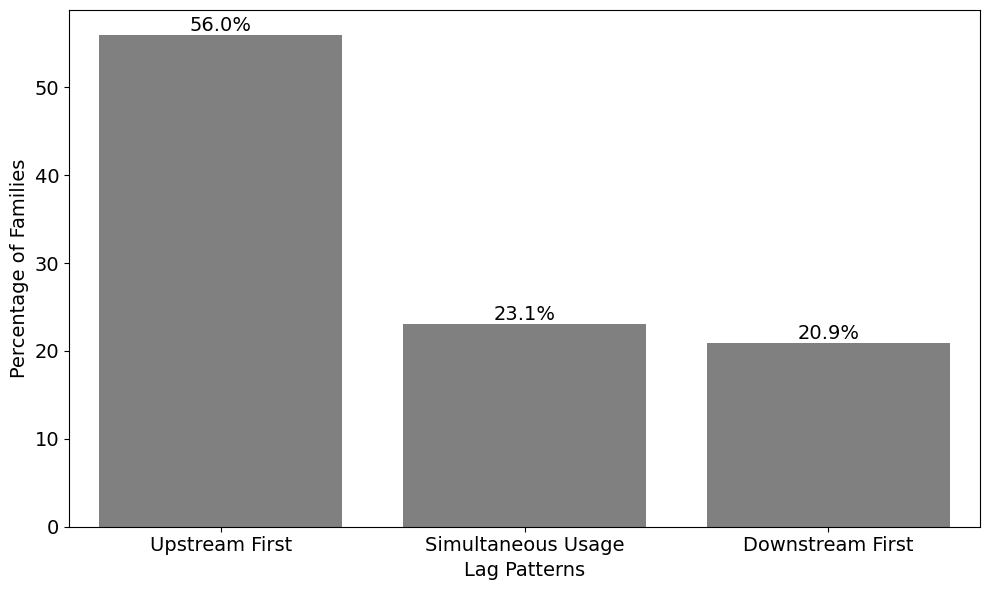

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file = "all_auto_and_manual_patterns.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# Exclusion list
exclusion = list(df2['family'].unique())

# Filter out excluded families
dfs = df1[~df1['family'].isin(exclusion)]

# Prepare the dataframe
df = dfs[["family", "Lagged"]]

df['Lagged'] = df['Lagged'].replace({
    'Upstream First': 'Upstream First',
    'Downstream First': 'Downstream First',
    'No Lag': 'Simultaneous Usage'
})

# Calculate the count of families for each 'Lagged' category
lagged_counts = df['Lagged'].value_counts().reset_index()
lagged_counts.columns = ['Lagged', 'Family Count']

# Calculate percentages for each category
lagged_counts['Percentage'] = (lagged_counts['Family Count'] / lagged_counts['Family Count'].sum()) * 100

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Lagged', y='Percentage', data=lagged_counts, color='gray')

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=14)

# Set the title and labels with font size 14
#plt.title("Distribution of Lagged Families", fontsize=14)
plt.xlabel("Lag Patterns", fontsize=14)
plt.ylabel("Percentage of Families", fontsize=14)

# Adjust font size for ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure as a PDF
plt.tight_layout()
plt.savefig("lagged_pattern.pdf", bbox_inches='tight')

# Show the plot
plt.show()


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11460\4098256717.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['names'] = dfs['names'].replace('Dispersed Alignment', 'Disperse Alignment')


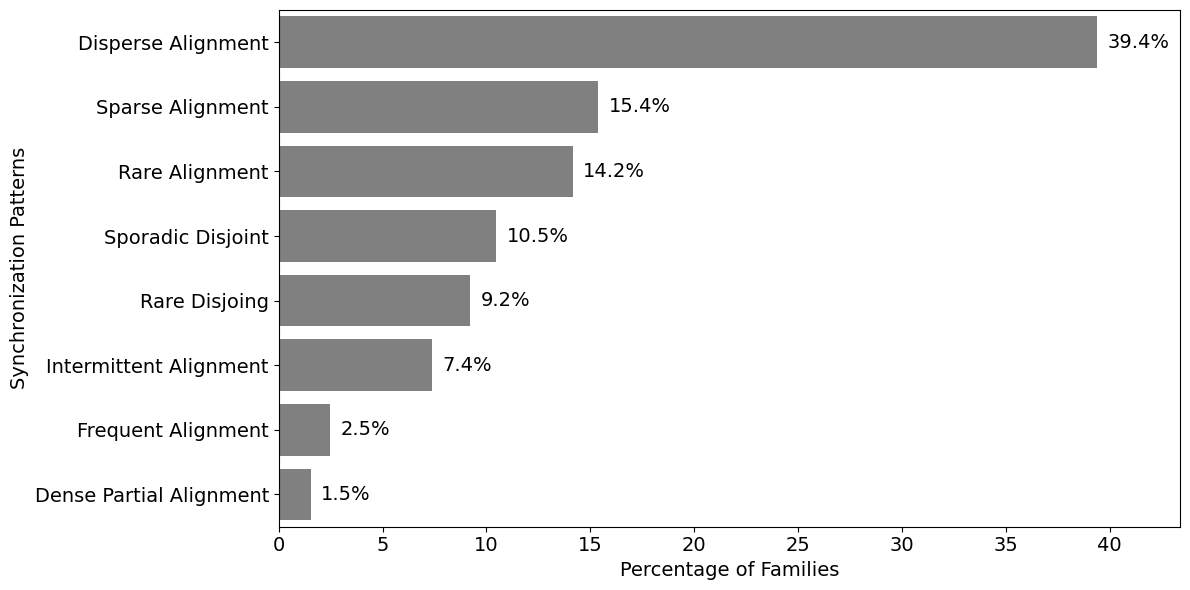

Bar chart saved as sync_pattern.pdf


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file = "all_auto_and_manual_patterns.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# Exclude specific families
exclusion = list(df2['family'].unique())
dfs = df1[~df1['family'].isin(exclusion)]

# Replace 'Dispersed Alignment' with 'Disperse Alignment'
dfs['names'] = dfs['names'].replace('Dispersed Alignment', 'Disperse Alignment')

# Data preparation
df = dfs[["family", "names"]]
name_family_count = df.groupby('names')['family'].nunique()
total_families = len(df['family'].unique())  # Total number of unique families

# Calculate the percentage of families involved for each name
percentage = (name_family_count / total_families) * 100

# Prepare data for plotting and sort by percentage
plot_data = pd.DataFrame({
    'names': name_family_count.index,
    'percentage': percentage
})

# Sort the data by 'percentage' in ascending order
plot_data = plot_data.sort_values('percentage', ascending=False)

# Create a seaborn barplot with custom color (gray bars)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='percentage', y='names', data=plot_data, color='gray')

# Add percentages on top of the bars, with a slight offset for better positioning
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5, p.get_y() + p.get_height() / 2, f'{width:.1f}%', ha='left', va='center', fontsize=14)

# Set x-axis limit to make sure percentages fit within the plot area
plt.xlim(0, max(percentage) + 4)

# Set labels and title with font size 14
ax.set_xlabel('Percentage of Families', fontsize=14)
ax.set_ylabel('Synchronization Patterns', fontsize=14)

# Set font size for ticks
plt.tick_params(axis='both', which='major', labelsize=14)

# Save the plot
plt.tight_layout()
plt.savefig("sync_pattern.pdf", bbox_inches='tight')

# Show the plot
plt.show()

print("Bar chart saved as sync_pattern.pdf")


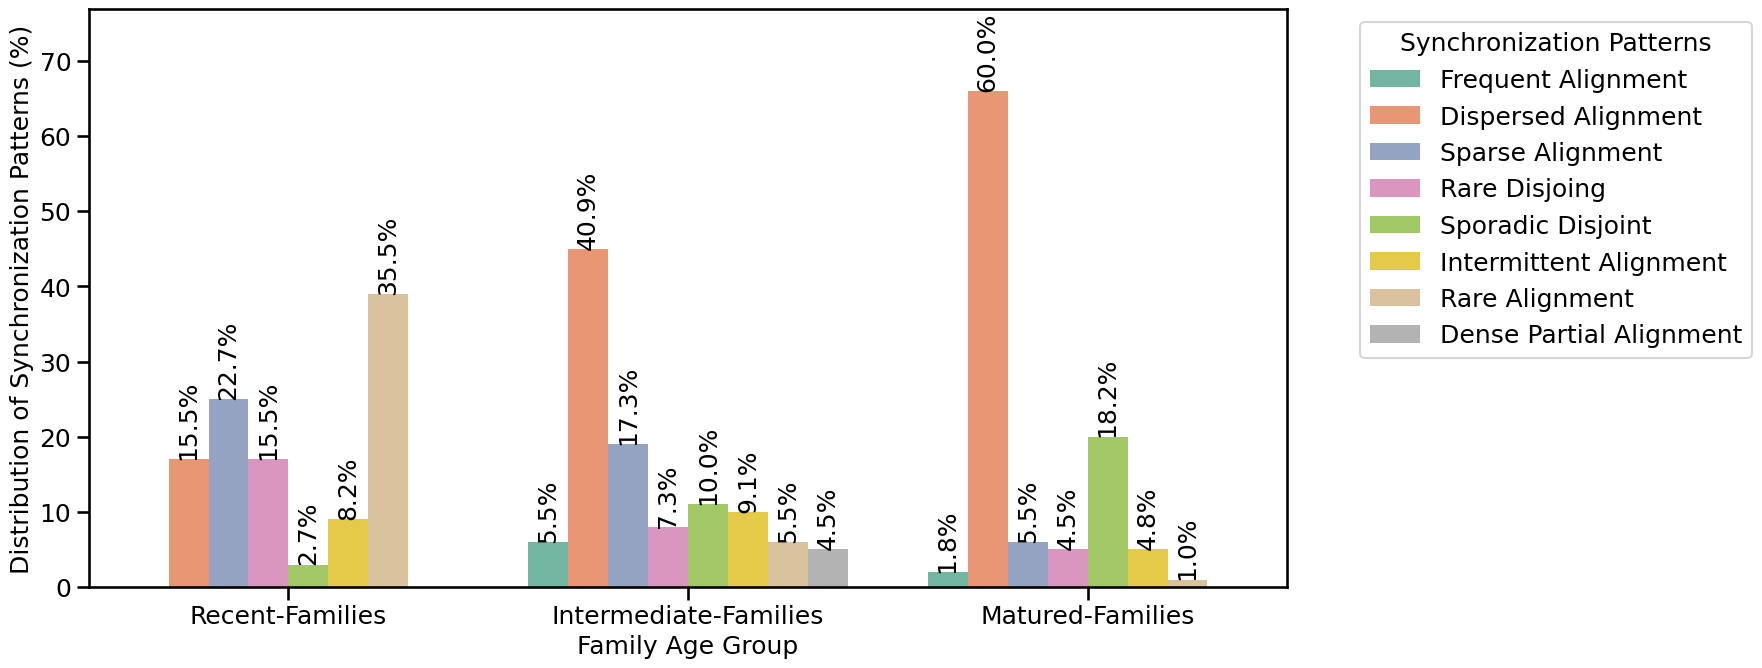

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file = "grouped_data_RQ2.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# Exclude specific families
exclusion = list(df2['family'].unique())
df = df1[~df1['family'].isin(exclusion)]

# Rename 'Lagged' values for clarity
df['Lagged'] = df['Lagged'].replace({
    'Upstream First': 'GitHub First',
    'Downstream First': 'Hugging Face First',
    'No Lag': 'Simultaneous'
})

"""name_mapping = {
    'Dense Alignment': 'Dense Synchronization',
    'Frequent Alignment': 'Frequent Synchronization',
    'Intermittent Alignment': 'Intermittent Synchronization',
    'Rare Alignment': 'Rare Synchronization',
    'Sparse Alignment': 'Sparse Synchronization',
    'Dispersed Alignment': 'Disperse Synchronization',
    'Dense Partial Alignment': 'Dense Partial Synchronization'
}

df['names'] = df['names'].replace(name_mapping)"""

# Define age group order
category_order = ["Recent-Families", "Intermediate-Families", "Matured-Families"]

# Count occurrences of each 'names' category in each 'age_group'
age_group_counts = df.groupby(['age_group', 'names']).size().reset_index(name='count')

# Calculate total count per age_group for percentage calculation
age_group_totals = df['age_group'].value_counts().reset_index(name='total')
age_group_totals.columns = ['age_group', 'total']

# Merge counts with totals to calculate percentages
age_group_counts = pd.merge(age_group_counts, age_group_totals, on='age_group')
age_group_counts['percentage'] = (age_group_counts['count'] / age_group_counts['total']) * 100

# Find max percentage for setting ylim
max_percentage = age_group_counts['percentage'].max()

# Create the countplot using Seaborn
plt.figure(figsize=(18, 7))
ax = sns.countplot(data=df, x="age_group", hue="names", palette="Set2", order=category_order)

# Set y-axis limit
plt.ylim(0, max_percentage + 14)  # Adjusted based on actual percentages

# Annotate bars with percentages
for p in ax.patches:
    height = p.get_height()
    age_group = category_order[int(p.get_x())]  # Get the age group
    total_count = age_group_totals[age_group_totals['age_group'] == age_group]['total'].values[0]
    
    if height > 0 and total_count > 0:
        percentage = (height / total_count) * 100  # Calculate per age group
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2, height),  
                    ha="center", va="bottom", fontsize=18, rotation=90)  # Rotated to 90 degrees

# Set labels and font sizes
plt.xlabel('Family Age Group', fontsize=18)
plt.ylabel('Distribution of Synchronization Patterns (%)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title='Synchronization Patterns', title_fontsize=18, fontsize=18, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("RQ2.3.1b.pdf", bbox_inches='tight')
plt.show()


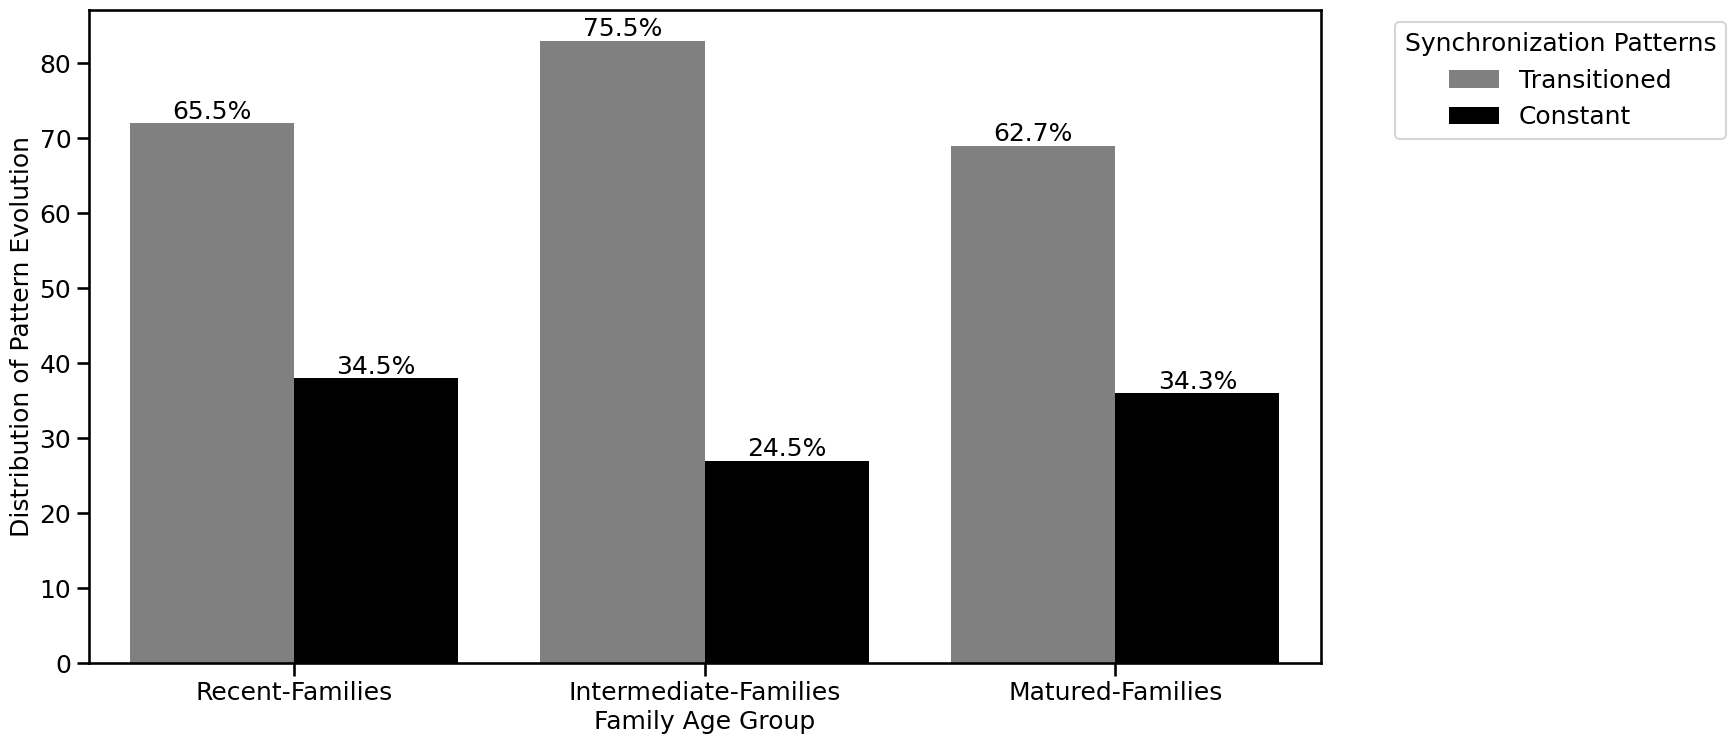

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set global font size using rcParams and Seaborn context
plt.rc('font', size=14)
sns.set_context("talk", font_scale=1.4)

# Load the dataset
file = "RQ2_early_late_pattern.csv"
file2 = "grouped_data_RQ2.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df_prime = pd.read_csv(file, encoding='latin1')
df2_prime = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(dfs2['family'].unique())

df1 = df_prime[~df_prime['family'].isin(exclusion)]
df2 = df2_prime[~df2_prime['family'].isin(exclusion)]

# Group families by age group
family = df2.groupby('family').agg({
    'age_group': lambda x: ",".join(map(str, x.unique())),
}).reset_index()

# Merge datasets
comb = pd.merge(df1, family, on='family', how='inner')

# Calculate transition and pattern change
comb["transition"] = comb["early_pattern"] + " → " + comb["late_pattern"]
comb["pattern_change"] = comb.apply(lambda row: "Constant" if row["early_pattern"] == row["late_pattern"] else "Transitioned", axis=1)

# Define age group order
category_order = ["Recent-Families", "Intermediate-Families", "Matured-Families"]

# Calculate evolution rate per age group
evolution_rates = (
    comb.groupby("age_group")["pattern_change"]
    .apply(lambda x: (x == "Transitioned").sum() / len(x) * 100)
    .reindex(category_order)
)

# Plot pattern change distribution with percentages
grey_palette = ["#808080", "#000000"]
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=comb, x="age_group", hue="pattern_change", palette=grey_palette, order=category_order)

# Increase font size for specific elements explicitly (if needed)
plt.xlabel('Family Age Group', fontsize=18)
plt.ylabel('Distribution of Pattern Evolution', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title='Synchronization Patterns', fontsize=18, title_fontsize=18, bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentages to the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        total_count = comb[comb["age_group"] == category_order[int(p.get_x())]].shape[0]
        percentage = (height / total_count) * 100 if total_count > 0 else 0
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha="center", va="bottom", fontsize=18)

# Show plot with tight layout and save it as PDF
plt.tight_layout()
plt.savefig("RQ2.3.1c.pdf")
plt.show()


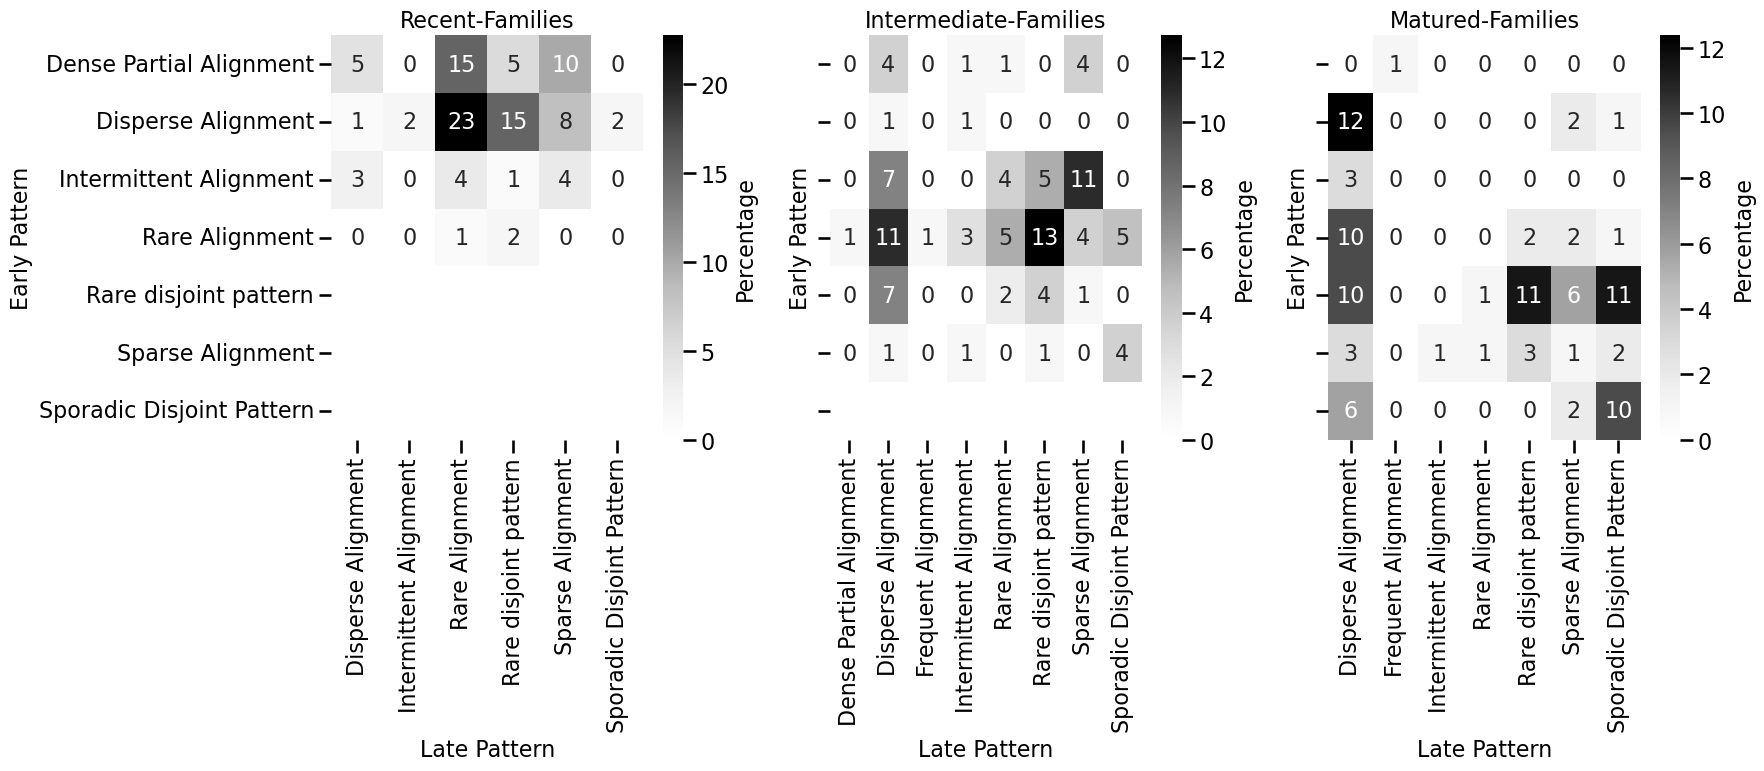

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set global font size
plt.rcParams.update({'font.size': 16})

# Load the dataset
file = "RQ2_early_late_pattern.csv"
file2 = "grouped_data_RQ2.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df_prime = pd.read_csv(file, encoding='latin1')
df2_prime = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(dfs2['family'].unique())

df = df_prime[~df_prime['family'].isin(exclusion)]
df2 = df2_prime[~df2_prime['family'].isin(exclusion)]

# Group families by age group
family = df2.groupby('family').agg({
    'age_group': lambda x: ",".join(map(str, x.unique())),
}).reset_index()

# Merge datasets
comb = pd.merge(df, family, on='family', how='inner')

# Define age group categories
category_order = ["Recent-Families", "Intermediate-Families", "Matured-Families"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# Name mapping
name_mapping = {
    'Dense Alignment Patter': 'Dense Alignment',
    'Frequent Alignment Pattern': 'Frequent Alignment',
    'Intermittent Alignment Pattern': 'Intermittent Alignment',
    'Rare Alignment Pattern': 'Rare Alignment',
    'Sparse Alignment Pattern': 'Sparse Alignment',
    'Dispersed Alignment Pattern': 'Disperse Alignment',
    'Dense Partial Alignment Pattern': 'Dense Partial Alignment'
}


"""name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization'
}"""

# Loop through age groups
for ax, age_group in zip(axes, category_order):
    group_data = comb[comb['age_group'] == age_group].copy()
    
    group_data['early_pattern'] = group_data['early_pattern'].replace(name_mapping)
    group_data['late_pattern'] = group_data['late_pattern'].replace(name_mapping)

    transition_matrix = pd.crosstab(
        group_data['early_pattern'], group_data['late_pattern']
    ).fillna(0)

    transition_matrix_percentage = (transition_matrix / transition_matrix.sum().sum()) * 100

    # Heatmap
    sns.heatmap(
        transition_matrix_percentage,
        annot=True, fmt=".0f", cmap="Greys", cbar=True,
        ax=ax, annot_kws={"size": 16}
    )

    # Titles and labels
    ax.set_title(f"{age_group}", fontsize=16)
    ax.set_xlabel("Late Pattern", fontsize=16)
    ax.set_ylabel("Early Pattern", fontsize=16)
    ax.tick_params(axis='both', labelsize=16)

    # Colorbar formatting
    if ax.collections:
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=16)
        cbar.set_label("Percentage", fontsize=16)

# Adjust layout and save
plt.tight_layout()
plt.savefig("RQ2.3.1d.pdf")
plt.show()


In [17]:
file = "RQ2_early_late_pattern.csv"
file2 = "grouped_data_RQ2.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

gh = "../RQ1/GH_data_devil.csv"
hf = "../RQ1//HF_data_devil.csv"


df_prime = pd.read_csv(file, encoding='latin1')
df2_prime = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

df_gh = pd.read_csv(gh, encoding='latin1')
df_hf = pd.read_csv(hf, encoding='latin1')

exclusion = list(dfs2['family'].unique())

df1 = df_prime[~df_prime['family'].isin(exclusion)]
df2 = df2_prime[~df2_prime['family'].isin(exclusion)]

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11460\716143072.py:13: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gh = pd.read_csv(gh, encoding='latin1')


In [18]:
# Group families by age group
family = df2.groupby('family').agg({
    'age_group': lambda x: ",".join(map(str, x.unique())),
}).reset_index()

# Merge datasets
comb = pd.merge(df1, family, on='family', how='inner')

# Calculate transition and pattern change
comb["transition"] = comb["early_pattern"] + " → " + comb["late_pattern"]
comb["pattern_change"] = comb.apply(lambda row: "Constant" if row["early_pattern"] == row["late_pattern"] else "Transitioned", axis=1)

main_df = comb[comb["pattern_change"] == "Transitioned"]

In [19]:
inclusion = list(main_df['family'].unique())

GH = df_gh[df_gh['family'].isin(inclusion)]
HF = df_hf[df_hf['family'].isin(inclusion)]

GH_data = GH[["family", "commit_message", "age_group", "author_username"]]
HF_data = HF[["family", "combined", "age_group", "author"]]

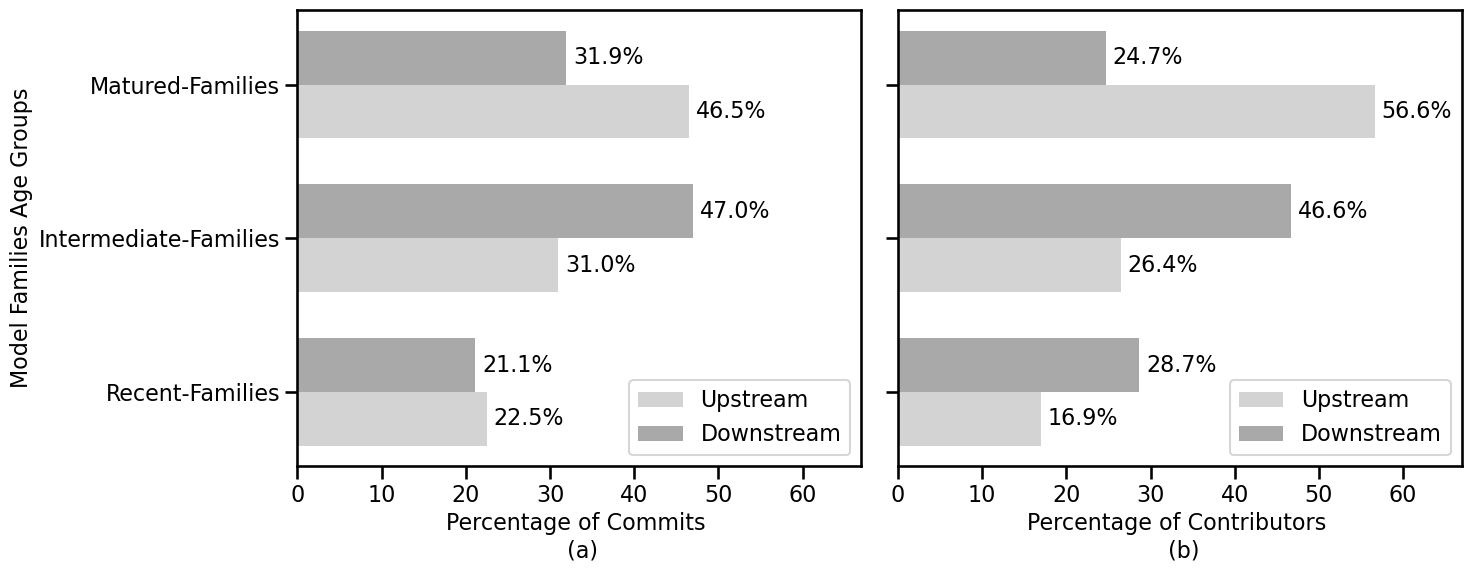

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

inclusion = list(main_df['family'].unique())

GH = df_gh[df_gh['family'].isin(inclusion)]
HF = df_hf[df_hf['family'].isin(inclusion)]

GH_data = GH[["family", "commit_message", "age_group", "author_username"]]
HF_data = HF[["family", "combined", "age_group", "author"]]

# Prepare data for commits
gh_commits = GH_data.groupby('age_group')['commit_message'].count()
hf_commits = HF_data.groupby('age_group')['combined'].count()

# Convert to percentages
gh_commits_pct = gh_commits / gh_commits.sum() * 100
hf_commits_pct = hf_commits / hf_commits.sum() * 100

# Prepare data for authors
gh_authors = GH_data.groupby('age_group')['author_username'].nunique()
hf_authors = HF_data.groupby('age_group')['author'].nunique()

# Convert to percentages
gh_authors_pct = gh_authors / gh_authors.sum() * 100
hf_authors_pct = hf_authors / hf_authors.sum() * 100

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Define age groups and positions for bars
age_groups = ['Recent-Families', 'Intermediate-Families', 'Matured-Families']
y = np.arange(len(age_groups))
height = 0.35

# Function to add value labels for horizontal bars
def add_value_labels_horizontal(ax, bars, font_size):
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.1f}%',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(5, 0),  # 5 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center', fontsize=font_size)

# Font size for all text elements
font_size = 16

# Plot commits
bars1 = ax1.barh(y - height/2, [gh_commits_pct.get(ag, 0) for ag in age_groups], height, label='Upstream', color='lightgray')
bars2 = ax1.barh(y + height/2, [hf_commits_pct.get(ag, 0) for ag in age_groups], height, label='Downstream', color='darkgray')

add_value_labels_horizontal(ax1, bars1, font_size)
add_value_labels_horizontal(ax1, bars2, font_size)

ax1.set_xlabel('Percentage of Commits \n (a)', fontsize=font_size)
ax1.set_yticks(y)
ax1.set_yticklabels(age_groups, fontsize=font_size)
ax1.set_ylabel('Model Families Age Groups', fontsize=font_size)
ax1.legend(fontsize=font_size, loc='lower right')
ax1.set_xlim(0, 67)
ax1.tick_params(axis='x', labelsize=font_size)

# Plot authors
bars3 = ax2.barh(y - height/2, [gh_authors_pct.get(ag, 0) for ag in age_groups], height, label='Upstream', color='lightgray')
bars4 = ax2.barh(y + height/2, [hf_authors_pct.get(ag, 0) for ag in age_groups], height, label='Downstream', color='darkgray')

add_value_labels_horizontal(ax2, bars3, font_size)
add_value_labels_horizontal(ax2, bars4, font_size)

ax2.set_xlabel('Percentage of Contributors \n (b)', fontsize=font_size)
ax2.set_ylabel('', fontsize=font_size)
ax2.legend(fontsize=font_size, loc='lower right')
ax2.set_xlim(0, 67)
ax2.tick_params(axis='x', labelsize=font_size)

# Adjust layout and display
plt.tight_layout()
plt.savefig("argument4.pdf", bbox_inches='tight')
plt.show()


In [12]:
import ast

# Load the datasets
file1 = "GH_labelled_with_patterns.csv"
file2 = "HF_labelled_with_patterns_authors.csv"
f2 = "../must_exclude_from_all_analysis.csv"
fams = "grouped_data_RQ2.csv"

df_gh = pd.read_csv(file1, encoding='latin1')
df_hf = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')
df2_prime = pd.read_csv(fams, encoding='latin1')

HF1 = df_hf[df_hf['author_HF'] != "No_GH"]

exclusion = list(dfs2['family'].unique())

GH_link = df_gh[~df_gh['family'].isin(exclusion)]
HF_link = HF1[~HF1['family'].isin(exclusion)]

gh = GH_link.groupby("family").agg({
    'author_GH': 'unique'
}).reset_index()

hf = HF_link.groupby("family").agg({
    'author_HF': 'unique'
}).reset_index()

def string_to_list(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (SyntaxError, ValueError):
            return []
    return x

# Apply the function to ensure that the author columns contains list
gh['author_GH'] = gh['author_GH'].apply(string_to_list)
hf['author_HF'] = hf['author_HF'].apply(string_to_list)
hf

,family,author_HF
0,01-ai_YI,"[https://github.com/Mia-xia, https://github.co..."
1,1-800-BAD-CODE_XLM-ROBERTA,[https://github.com/1-800-BAD-CODE]
2,42dot_42DOT-LLM,[https://github.com/wangcho2k]
3,AnnaWegmann_Style-Embedding,[https://github.com/AnnaWegmann]
4,BAAI_bge,"[https://github.com/zacliu2023, https://github..."
...,...,...
301,wukevin_tcr-bert,[https://github.com/wukevin]
302,wxjiao_alpaca,[https://github.com/wxjiao]
303,xlnet_xlnet,"[https://github.com/gante, https://github.com/..."
304,yahma_llama,[https://github.com/gururise]


In [13]:
merged = pd.merge(hf, gh,  on="family", how="inner")

# Extract three families, their authors, and common authors
sample_families = merged  # Select the first three families
family_data = []

for _, row in sample_families.iterrows():
    family_name = row['family']
    authors_gh = set(row['author_GH'])  # Convert to set for comparison
    authors_hf = set(row['author_HF'])
    common_authors = list(authors_hf.intersection(authors_gh))  # Find common authors

    family_data.append({
        "family": family_name,
        "authors_GH": list(authors_gh),
        "authors_HF": list(authors_hf),
        "common_authors": common_authors
    })

# Convert to a DataFrame for easy display
result_df = pd.DataFrame(family_data)
result_df = result_df[result_df['common_authors'].apply(len) > 0]
#result_df['common_authors_count'] = result_df['common_authors'].apply(len)
exploded_df = result_df.explode('common_authors')

# Reset the index of the exploded dataframe
exploded_df = exploded_df.reset_index(drop=True)

# Display the exploded dataframe
exploded_df

,family,authors_GH,authors_HF,common_authors
0,01-ai_YI,"[https://github.com/Jack-devnlp, https://githu...","[https://github.com/findmyway, https://github....",https://github.com/findmyway
1,01-ai_YI,"[https://github.com/Jack-devnlp, https://githu...","[https://github.com/findmyway, https://github....",https://github.com/Anonymitaet
2,01-ai_YI,"[https://github.com/Jack-devnlp, https://githu...","[https://github.com/findmyway, https://github....",https://github.com/Mia-xia
3,01-ai_YI,"[https://github.com/Jack-devnlp, https://githu...","[https://github.com/findmyway, https://github....",https://github.com/ZhaoFancy
4,1-800-BAD-CODE_XLM-ROBERTA,"[https://github.com/Unknown, https://github.co...",[https://github.com/1-800-BAD-CODE],https://github.com/1-800-BAD-CODE
...,...,...,...,...
289,whaleloops_phrase-bert,"[https://github.com/whaleloops, https://github...",[https://github.com/whaleloops],https://github.com/whaleloops
290,wonrax_phobert,[https://github.com/wonrax],[https://github.com/wonrax],https://github.com/wonrax
291,wukevin_tcr-bert,"[https://github.com/swansonk14, https://github...",[https://github.com/wukevin],https://github.com/wukevin
292,wxjiao_alpaca,[https://github.com/wxjiao],[https://github.com/wxjiao],https://github.com/wxjiao


In [14]:
common_author_list = list(exploded_df["common_authors"].unique())
exclusion = list(dfs2['family'].unique())

GH_df = df_gh[~df_gh['family'].isin(exclusion)]
HF_df = df_hf[~df_hf['family'].isin(exclusion)]

family_groups = df2_prime.groupby(["family", "names", "Lagged", "age_group"])['model_name'].mean().reset_index()

merge_gh = pd.merge(GH_df, family_groups, on="family", how="inner")
merge_hf = pd.merge(HF_df, family_groups, on="family", how="inner")

tent_GH = merge_gh[merge_gh['author_GH'].isin(common_author_list)]
tent_HF = merge_hf[merge_hf['author_HF'].isin(common_author_list)]

In [15]:
tent_GH

,owner,cleaned_github,author_name,commit_message,author_username,commit_date,family,label,patterns,author_GH,names,Lagged,age_group,model_name
18,01-ai,https://github.com/01-ai/yi,Mia-xia,add files via upload,Mia-xia,2024-09-04 11:36:58+00:00,01-ai_YI,external documentation,Frequent Alignment Pattern,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
19,01-ai,https://github.com/01-ai/yi,Mia-xia,add files via upload,Mia-xia,2024-09-04 11:36:58+00:00,01-ai_YI,input data,Frequent Alignment Pattern,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
20,01-ai,https://github.com/01-ai/yi,Mia-xia,add files via upload,Mia-xia,2024-09-04 11:36:58+00:00,01-ai_YI,preprocessing,Frequent Alignment Pattern,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
21,01-ai,https://github.com/01-ai/yi,Mia-xia,add files via upload,Mia-xia,2024-09-04 10:52:14+00:00,01-ai_YI,external documentation,Frequent Alignment Pattern,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
22,01-ai,https://github.com/01-ai/yi,Mia-xia,add files via upload,Mia-xia,2024-09-04 10:52:14+00:00,01-ai_YI,input data,Frequent Alignment Pattern,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133495,llm-blender,https://github.com/yuchenlin/LLM-Blender,(Bill) Yuchen Lin,copied from swiftsage templates,yuchenlin,2023-05-31 22:37:13+00:00,llm-blender_PairRM,internal documentation,Intermittent Alignment Pattern,https://github.com/yuchenlin,Intermittent Alignment,Upstream First,Recent-Families,1.0
133496,llm-blender,https://github.com/yuchenlin/LLM-Blender,(Bill) Yuchen Lin,rename folder,yuchenlin,2023-05-31 22:34:37+00:00,llm-blender_PairRM,project metadata,Intermittent Alignment Pattern,https://github.com/yuchenlin,Intermittent Alignment,Upstream First,Recent-Families,1.0
133497,llm-blender,https://github.com/yuchenlin/LLM-Blender,(Bill) Yuchen Lin,rename folder,yuchenlin,2023-05-31 22:34:37+00:00,llm-blender_PairRM,internal documentation,Intermittent Alignment Pattern,https://github.com/yuchenlin,Intermittent Alignment,Upstream First,Recent-Families,1.0
133498,llm-blender,https://github.com/yuchenlin/LLM-Blender,(Bill) Yuchen Lin,create index.html,yuchenlin,2023-05-31 22:32:59+00:00,llm-blender_PairRM,external documentation,Intermittent Alignment Pattern,https://github.com/yuchenlin,Intermittent Alignment,Upstream First,Recent-Families,1.0


In [16]:
tent_HF

,owner,model_name_x,created_at,last_updated,family,model_size,previous_size_category,downloads,likes,library_name,...,files,combined,label,patterns,full_name,author_HF,names,Lagged,age_group,model_name_y
0,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.035520,large,68355,174,transformers,...,tokenizer.json,upload tokenizer.json,preprocessing,Frequent Alignment Pattern,Mia@01ai,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
1,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.035520,large,68355,174,transformers,...,tokenizer.json,delete tokenizer.json,preprocessing,Frequent Alignment Pattern,Mia@01ai,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
7,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.035520,large,68355,174,transformers,...,tokenizer.json,upload tokenizer.json,preprocessing,Frequent Alignment Pattern,Mia Xia,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
9,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.035520,large,68355,174,transformers,...,README.md,update readme.md,external documentation,Frequent Alignment Pattern,Yu,https://github.com/Anonymitaet,Frequent Alignment,No Lag,Intermediate-Families,9.0
10,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.035520,large,68355,174,transformers,...,README.md,update readme.md,external documentation,Frequent Alignment Pattern,Yu,https://github.com/Anonymitaet,Frequent Alignment,No Lag,Intermediate-Families,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16303,yangheng,yangheng/deberta-v3-base-absa-v1.1,3/19/2022,7/22/2024,yangheng_absa-model,184.424963,medium,51038,35,transformers,...,README.md,update readme.md,external documentation,Dispersed Alignment Pattern,HENG YANG,https://github.com/yangheng95,Dispersed Alignment,Upstream First,Matured-Families,1.0
16304,yangheng,yangheng/deberta-v3-base-absa-v1.1,3/19/2022,7/22/2024,yangheng_absa-model,184.424963,medium,51038,35,transformers,...,README.md,update readme.md,external documentation,Dispersed Alignment Pattern,HENG YANG,https://github.com/yangheng95,Dispersed Alignment,Upstream First,Matured-Families,1.0
16305,yangheng,yangheng/deberta-v3-base-absa-v1.1,3/19/2022,7/22/2024,yangheng_absa-model,184.424963,medium,51038,35,transformers,...,README.md,update readme.md,external documentation,Dispersed Alignment Pattern,HENG YANG,https://github.com/yangheng95,Dispersed Alignment,Upstream First,Matured-Families,1.0
16307,yangheng,yangheng/deberta-v3-base-absa-v1.1,3/19/2022,7/22/2024,yangheng_absa-model,184.424963,medium,51038,35,transformers,...,README.md,update readme.md,external documentation,Dispersed Alignment Pattern,HENG YANG,https://github.com/yangheng95,Dispersed Alignment,Upstream First,Matured-Families,1.0


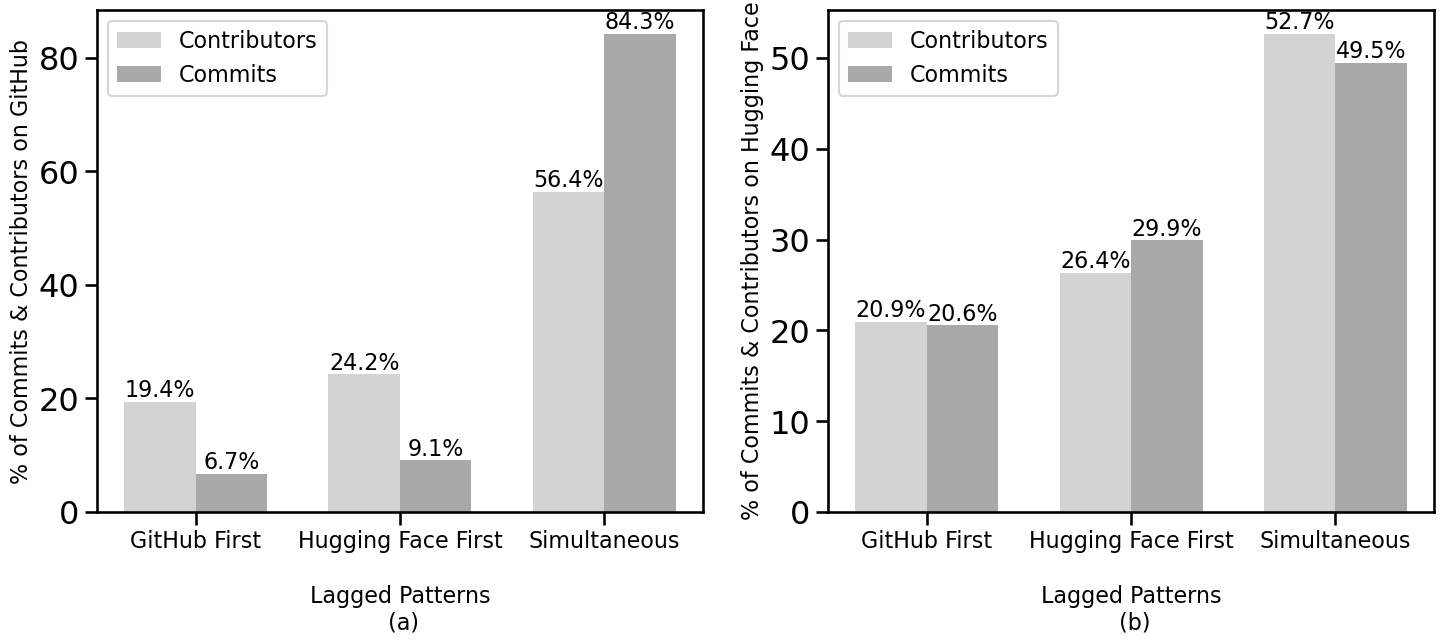

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for GitHub
gh_data = tent_GH.groupby('Lagged').agg({
    'author_GH': 'nunique',
    'commit_message': 'count'
}).reset_index()

gh_data['author_pct'] = gh_data['author_GH'] / gh_data['author_GH'].sum() * 100
gh_data['commit_pct'] = gh_data['commit_message'] / gh_data['commit_message'].sum() * 100

# Prepare data for Hugging Face
hf_data = tent_HF.groupby('Lagged').agg({
    'author_HF': 'nunique',
    'combined': 'count'
}).reset_index()

hf_data['author_pct'] = hf_data['author_HF'] / hf_data['author_HF'].sum() * 100
hf_data['commit_pct'] = hf_data['combined'] / hf_data['combined'].sum() * 100

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Define lag groups and positions for bars
lag_groups = ['GitHub First', 'Hugging Face First', 'Simultaneous']
x = np.arange(len(lag_groups))
width = 0.35

# Plot for GitHub
ax1.bar(x - width/2, gh_data['author_pct'], width, label='Contributors', color='lightgray')
ax1.bar(x + width/2, gh_data['commit_pct'], width, label='Commits', color='darkgray')

ax1.set_ylabel('% of Commits & Contributors on GitHub', fontsize=16)
ax1.set_xlabel('\n Lagged Patterns \n (a)', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(lag_groups, rotation=0, ha='center', fontsize=16)
ax1.legend(fontsize=16)

# Add percentage labels
for i, v in enumerate(gh_data['author_pct']):
    ax1.text(i - width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)
for i, v in enumerate(gh_data['commit_pct']):
    ax1.text(i + width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)

# Plot for Hugging Face
ax2.bar(x - width/2, hf_data['author_pct'], width, label='Contributors', color='lightgray')
ax2.bar(x + width/2, hf_data['commit_pct'], width, label='Commits', color='darkgray')

ax2.set_ylabel('% of Commits & Contributors on Hugging Face', fontsize=16)
ax2.set_xlabel('\n Lagged Patterns \n (b)', fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(lag_groups, rotation=0, ha='center', fontsize=16)
ax2.legend(fontsize=16)

# Add percentage labels
for i, v in enumerate(hf_data['author_pct']):
    ax2.text(i - width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)
for i, v in enumerate(hf_data['commit_pct']):
    ax2.text(i + width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.savefig("argument5.pdf", bbox_inches='tight')
plt.show()


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\2597859816.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tent_GH['Lagged'] = tent_GH['Lagged'].replace(rename_map)
C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\2597859816.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tent_HF['Lagged'] = tent_HF['Lagged'].replace(rename_map)
C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\2597859816.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

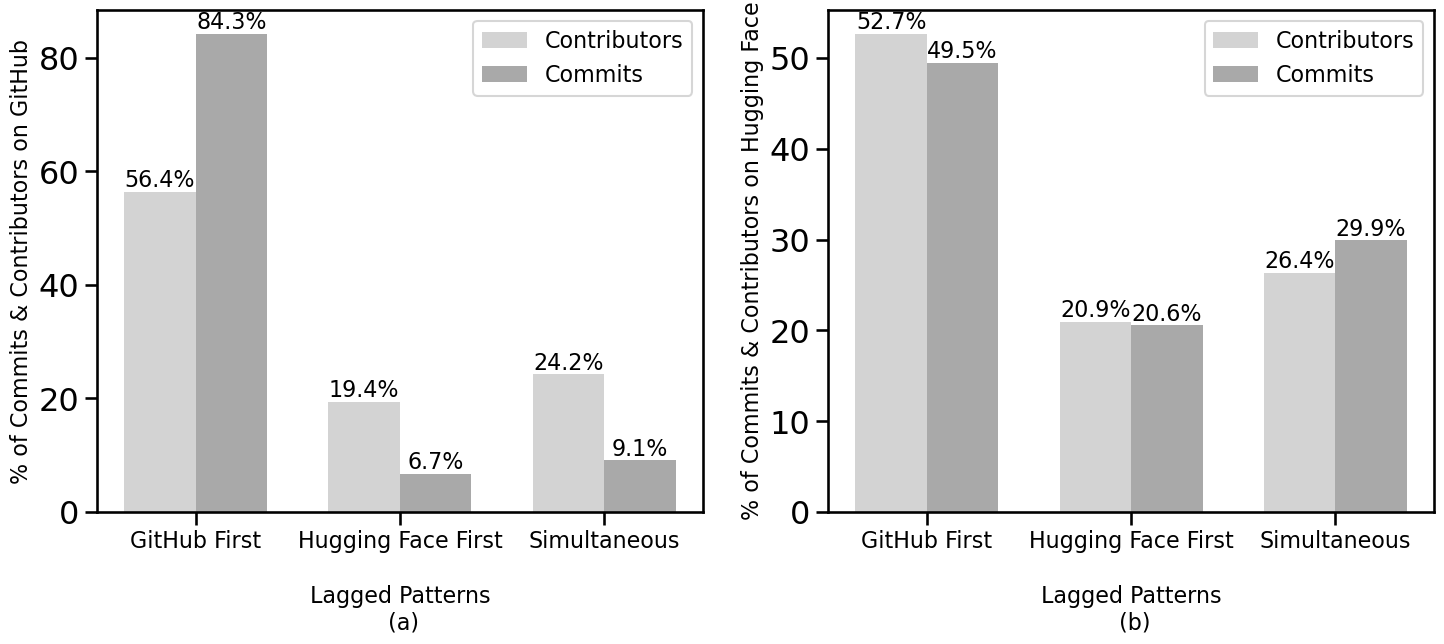

In [18]:
common_author_list = list(exploded_df["common_authors"].unique())
exclusion = list(dfs2['family'].unique())

GH_df = df_gh[~df_gh['family'].isin(exclusion)]
HF_df = df_hf[~df_hf['family'].isin(exclusion)]

family_groups = df2_prime.groupby(["family", "names", "Lagged", "age_group"])['model_name'].mean().reset_index()

merge_gh = pd.merge(GH_df, family_groups, on="family", how="inner")
merge_hf = pd.merge(HF_df, family_groups, on="family", how="inner")

tent_GH = merge_gh[merge_gh['author_GH'].isin(common_author_list)]
tent_HF = merge_hf[merge_hf['author_HF'].isin(common_author_list)]

rename_map = {
    'Upstream First': 'GitHub First',
    'Downstream First': 'Hugging Face First',
    'No Lag': 'Simultaneous'
}

tent_GH['Lagged'] = tent_GH['Lagged'].replace(rename_map)
tent_HF['Lagged'] = tent_HF['Lagged'].replace(rename_map)

# Ensure categorical ordering for correct plotting
category_order = ['GitHub First', 'Hugging Face First', 'Simultaneous']
tent_GH['Lagged'] = pd.Categorical(tent_GH['Lagged'], categories=category_order)
tent_HF['Lagged'] = pd.Categorical(tent_HF['Lagged'], categories=category_order)

# --- ORIGINAL CODE WITH CRITICAL FIXES ---
# Prepare data for GitHub
gh_data = tent_GH.groupby('Lagged', observed=True).agg({
    'author_GH': 'nunique',
    'commit_message': 'count'
}).reset_index()

gh_data['author_pct'] = gh_data['author_GH'] / gh_data['author_GH'].sum() * 100
gh_data['commit_pct'] = gh_data['commit_message'] / gh_data['commit_message'].sum() * 100

# Prepare data for Hugging Face
hf_data = tent_HF.groupby('Lagged', observed=True).agg({
    'author_HF': 'nunique',
    'combined': 'count'
}).reset_index()

hf_data['author_pct'] = hf_data['author_HF'] / hf_data['author_HF'].sum() * 100
hf_data['commit_pct'] = hf_data['combined'] / hf_data['combined'].sum() * 100

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Define lag groups and positions for bars
lag_groups = category_order  # Use the predefined order
x = np.arange(len(lag_groups))
width = 0.35

# --- GitHub Plot ---
ax1.bar(x - width/2, gh_data['author_pct'], width, label='Contributors', color='lightgray')
ax1.bar(x + width/2, gh_data['commit_pct'], width, label='Commits', color='darkgray')

ax1.set_ylabel('% of Commits & Contributors on GitHub', fontsize=16)
ax1.set_xlabel('\n Lagged Patterns \n (a)', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(lag_groups, rotation=0, ha='center', fontsize=16)
ax1.legend(fontsize=16)

# Add percentage labels
for i, v in enumerate(gh_data['author_pct']):
    ax1.text(i - width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)
for i, v in enumerate(gh_data['commit_pct']):
    ax1.text(i + width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)

# --- Hugging Face Plot ---
ax2.bar(x - width/2, hf_data['author_pct'], width, label='Contributors', color='lightgray')
ax2.bar(x + width/2, hf_data['commit_pct'], width, label='Commits', color='darkgray')

ax2.set_ylabel('% of Commits & Contributors on Hugging Face', fontsize=16)
ax2.set_xlabel('\n Lagged Patterns \n (b)', fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(lag_groups, rotation=0, ha='center', fontsize=16)
ax2.legend(fontsize=16)

# Add percentage labels
for i, v in enumerate(hf_data['author_pct']):
    ax2.text(i - width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)
for i, v in enumerate(hf_data['commit_pct']):
    ax2.text(i + width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.savefig("argument5.pdf", bbox_inches='tight')
plt.show()

In [ ]:
gh_data

In [ ]:
hf_data

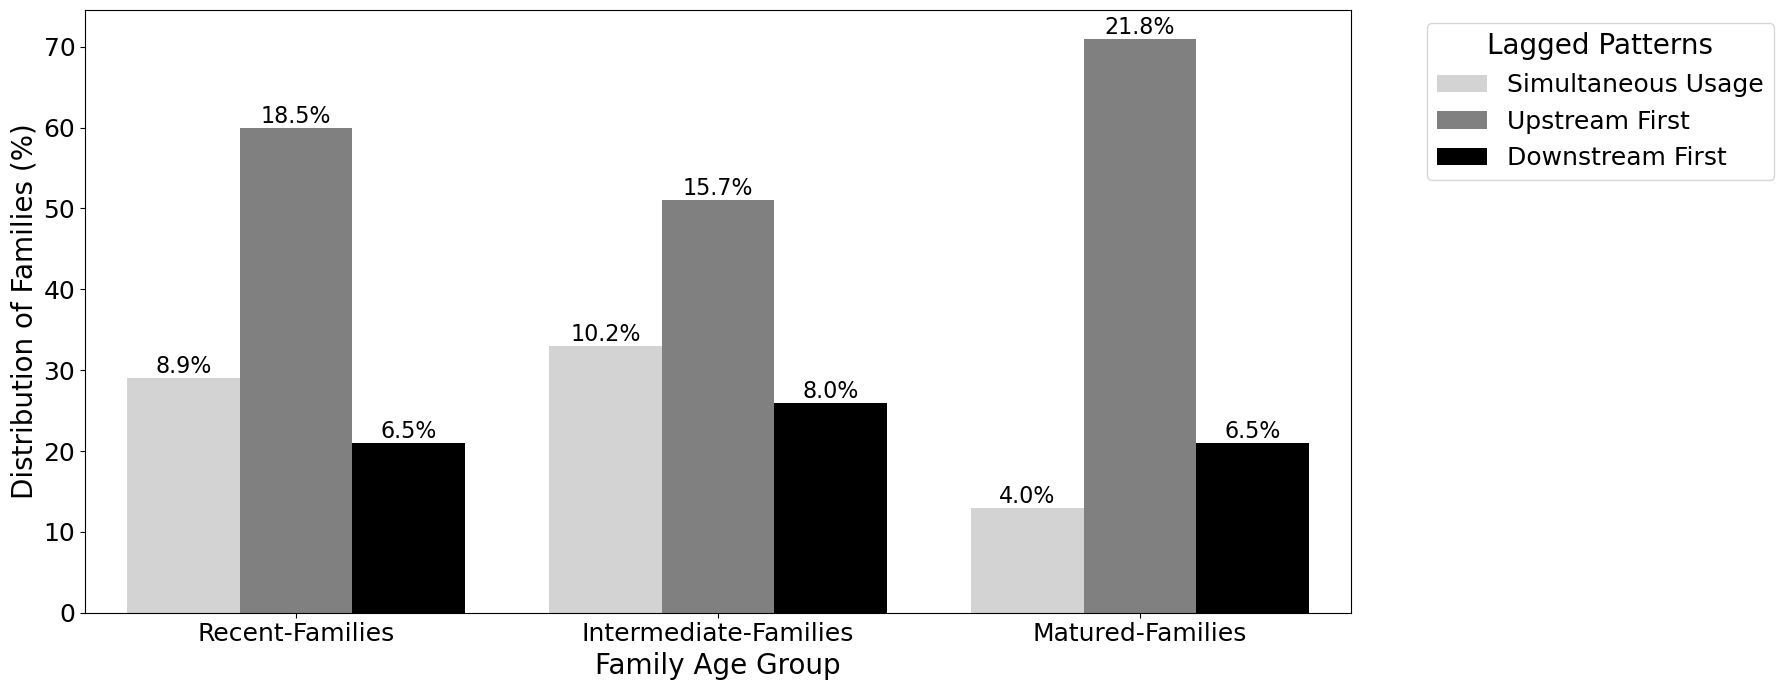

Index(['owner', 'family', 'family.1', 'model_name', 'pattern_names',
       'average_age_days', 'names', 'pipeline_tag', 'Lagged', 'library_name',
       'model_size_million_bytes', 'age_group'],
      dtype='object')


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file = "grouped_data_RQ2.csv"
f2 = "../must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(df2['family'].unique())

df = df1[~df1['family'].isin(exclusion)]

"""df['Lagged'] = df['Lagged'].replace({
    'Upstream First': 'GitHub First',
    'Downstream First': 'Hugging Face First',
    'No Lag': 'Simultaneous'
})"""

df['Lagged'] = df['Lagged'].replace({
    'Upstream First': 'Upstream First',
    'Downstream First': 'Downstream First',
    'No Lag': 'Simultaneous Usage'
})

age_group_counts = df.groupby(['age_group', 'Lagged']).size().reset_index(name='count')

# Calculate the total count in each age_group for percentage calculation
age_group_totals = df['age_group'].value_counts().reset_index(name='total')
age_group_totals.columns = ['age_group', 'total']

category_order = ["Recent-Families", "Intermediate-Families", "Matured-Families"]

# Merge the counts with total counts to calculate percentages
age_group_counts = pd.merge(age_group_counts, age_group_totals, on='age_group')
age_group_counts['percentage'] = (age_group_counts['count'] / age_group_counts['total']) * 100

families_in_age = df.groupby('age_group')['family'].nunique()

# Plotting the distribution using seaborn countplot
grey_palette = ["#d3d3d3", "#808080", "#000000"] # Light grey, dark grey and black

# Plot with grey palette
plt.figure(figsize=(18, 7))
ax = sns.countplot(data=df, x="age_group", hue="Lagged", palette=grey_palette, order=category_order)

# Calculate total counts for percentages
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = (height / total_counts) * 100
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha="center", va="bottom", fontsize=16)  # Increased font size to 16

# Adding labels and title
plt.xlabel('Family Age Group', fontsize=20)
plt.ylabel('Distribution of Families (%)', fontsize=20)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)

# Increase legend font size
plt.legend(title='Lagged Patterns', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=20)

# Adjust layout and save
plt.tight_layout()
plt.savefig("RQ2.3.1a.pdf", bbox_inches='tight')
plt.show()

print(df.columns)


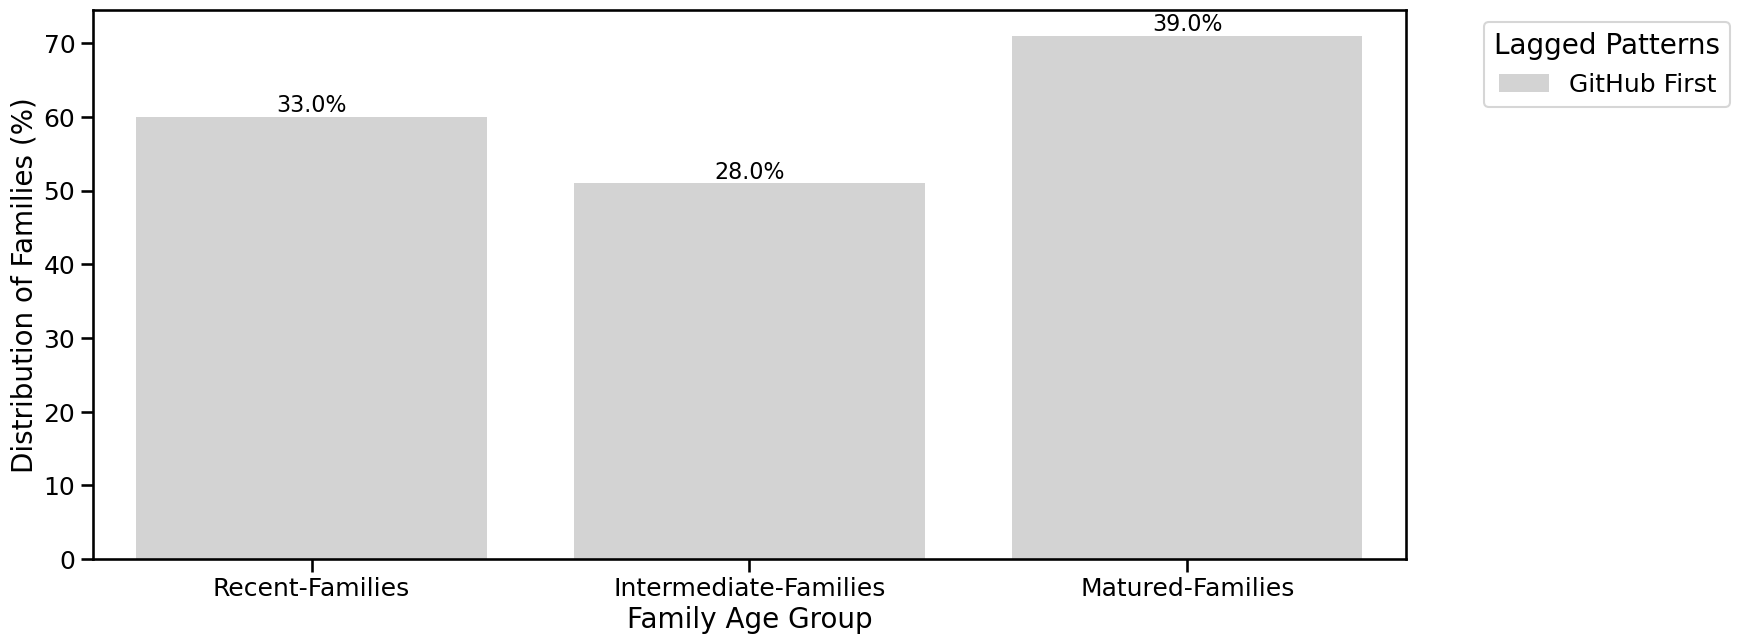

Index(['owner', 'family', 'family.1', 'model_name', 'pattern_names',
       'average_age_days', 'names', 'pipeline_tag', 'Lagged', 'library_name',
       'model_size_million_bytes', 'age_group'],
      dtype='object')


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file = "grouped_data_RQ2.csv"
f2 = "../must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(df2['family'].unique())

df_prime = df1[~df1['family'].isin(exclusion)]

df_prime['Lagged'] = df_prime['Lagged'].replace({
    'Upstream First': 'GitHub First',
    'Downstream First': 'Hugging Face First',
    'No Lag': 'Simultaneous'
})

df = df_prime[df_prime['Lagged'] == "GitHub First"]

age_group_counts = df.groupby(['age_group', 'Lagged']).size().reset_index(name='count')

# Calculate the total count in each age_group for percentage calculation
age_group_totals = df['age_group'].value_counts().reset_index(name='total')
age_group_totals.columns = ['age_group', 'total']

category_order = ["Recent-Families", "Intermediate-Families", "Matured-Families"]

# Merge the counts with total counts to calculate percentages
age_group_counts = pd.merge(age_group_counts, age_group_totals, on='age_group')
age_group_counts['percentage'] = (age_group_counts['count'] / age_group_counts['total']) * 100

families_in_age = df.groupby('age_group')['family'].nunique()

# Plotting the distribution using seaborn countplot
grey_palette = ["#d3d3d3", "#808080", "#000000"] # Light grey, dark grey and black

# Plot with grey palette
plt.figure(figsize=(18, 7))
ax = sns.countplot(data=df, x="age_group", hue="Lagged", palette=grey_palette, order=category_order)

# Calculate total counts for percentages
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = (height / total_counts) * 100
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha="center", va="bottom", fontsize=16)  # Increased font size to 16

# Adding labels and title
plt.xlabel('Family Age Group', fontsize=20)
plt.ylabel('Distribution of Families (%)', fontsize=20)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)

# Increase legend font size
plt.legend(title='Lagged Patterns', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=20)

# Adjust layout and save
plt.tight_layout()
plt.savefig("RQ2.3.1a.pdf", bbox_inches='tight')
plt.show()

print(df.columns)


In [21]:
df1

,owner,family,family.1,model_name,pattern_names,average_age_days,names,pipeline_tag,Lagged,library_name,model_size_million_bytes,age_group
0,01-ai,01-ai_YI,01-ai_YI,9,Frequent Alignment Pattern,195.444444,Frequent Alignment,text-generation,No Lag,transformers,22721.538590,Intermediate-Families
1,1-800-BAD-CODE,1-800-BAD-CODE_XLM-ROBERTA,1-800-BAD-CODE_XLM-ROBERTA,1,Dispersed Alignment Pattern,68.000000,Dispersed Alignment,text2text-generation,Upstream First,generic,34388.917250,Recent-Families
2,42dot,42dot_42DOT-LLM,42dot_42DOT-LLM,1,Sparse Alignment Pattern,140.000000,Sparse Alignment,text-generation,No Lag,transformers,1439.271680,Intermediate-Families
3,af1tang,af1tang_PERSONALGPT,af1tang_PERSONALGPT,1,Rare Disjoing pattern,715.000000,Rare Disjoing,text-generation,Upstream First,transformers,117.000000,Matured-Families
4,ai-forever,ai-forever_gpt,ai-forever_gpt,5,Dispersed Alignment Pattern,915.200000,Dispersed Alignment,"text-generation,fill-mask",No Lag,transformers,368.981734,Matured-Families
...,...,...,...,...,...,...,...,...,...,...,...,...
320,wxjiao,wxjiao_alpaca,xlnet_xlnet,1,Rare Alignment Pattern,15.000000,Rare Alignment,text-generation,No Lag,transformers,7000.000000,Recent-Families
321,xlnet,xlnet_xlnet,yahma_llama,2,Dispersed Alignment Pattern,1300.500000,Dispersed Alignment,text-generation,No Lag,transformers,0.000000,Matured-Families
322,yahma,yahma_llama,yangheng_absa-model,1,Rare Disjoing pattern,0.000000,Rare Disjoing,text-generation,Upstream First,transformers,7000.000000,Recent-Families
323,yangheng,yangheng_absa-model,YituTech_conv-bert,1,Dispersed Alignment Pattern,774.000000,Dispersed Alignment,text-classification,Upstream First,transformers,184.424963,Matured-Families


In [22]:
f2 = "../RQ1/must_exclude_from_all_analysis.csv"
gh = "../RQ1/GH_data_devil.csv"
hf = "../RQ1//HF_data_devil.csv"

dfs2 = pd.read_csv(f2, encoding='latin1')
df_gh = pd.read_csv(gh, encoding='latin1')
df_hf = pd.read_csv(hf, encoding='latin1')

exclusion = list(dfs2['family'].unique())

df1 = df_gh[~df_gh['family'].isin(exclusion)]
df2 = df_hf[~df_hf['family'].isin(exclusion)]

df1['Year'] = pd.to_datetime(df1['commit_date']).dt.year

# For df2: Extract year from 'date' column
df2['Year'] = pd.to_datetime(df2['date']).dt.year

GH1 = df1[df1["Year"] >= 2016]
HF1 = df2[df2["Year"] >= 2016]

"""GH = GH1.groupby(['owner', 'clean_github', 'family', 'age_group']).agg({
    "commit_date": 
})"""

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\1720242143.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gh = pd.read_csv(gh, encoding='latin1')


'GH = GH1.groupby([\'owner\', \'clean_github\', \'family\', \'age_group\']).agg({\n    "commit_date": \n})'

In [23]:
df1

,owner,cleaned_github,author_name,commit_message,author_username,commit_date,family,label,issue_resolved,age_group,category,Year
0,01-ai,https://github.com/01-ai/yi,Haijian Wang,update readme.md,Haijian06,2024-09-23 12:36:06+00:00,01-ai_YI,external documentation,NaN,Intermediate-Families,Release Pipeline,2024
1,01-ai,https://github.com/01-ai/yi,nlmlml,update readme.md,nlmlml,2024-09-23 12:19:50+00:00,01-ai_YI,external documentation,NaN,Intermediate-Families,Release Pipeline,2024
2,01-ai,https://github.com/01-ai/yi,Haijian Wang,update readme.md,Haijian06,2024-09-23 12:17:42+00:00,01-ai_YI,external documentation,NaN,Intermediate-Families,Release Pipeline,2024
3,01-ai,https://github.com/01-ai/yi,Haijian Wang,update readme.md,Haijian06,2024-09-23 12:13:15+00:00,01-ai_YI,external documentation,NaN,Intermediate-Families,Release Pipeline,2024
4,01-ai,https://github.com/01-ai/yi,Haijian Wang,update readme.md,Haijian06,2024-09-23 12:08:43+00:00,01-ai_YI,external documentation,NaN,Intermediate-Families,Release Pipeline,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
133141,xlnet,https://github.com/zihangdai/xlnet,Zihang Dai,edit download link,zihangdai,2019-06-19 23:34:13+00:00,xlnet_xlnet,external documentation,NaN,Matured-Families,Release Pipeline,2019
133142,xlnet,https://github.com/zihangdai/xlnet,Zihang Dai,merge branch 'master' of github.com:zihangdai/...,zihangdai,2019-06-19 23:23:46+00:00,xlnet_xlnet,internal documentation,NaN,Matured-Families,Release Pipeline,2019
133143,xlnet,https://github.com/zihangdai/xlnet,Zihang Dai,initial release of xlnet,zihangdai,2019-06-19 23:23:36+00:00,xlnet_xlnet,project metadata,NaN,Matured-Families,Release Pipeline,2019
133144,xlnet,https://github.com/zihangdai/xlnet,Zhilin Yang,update license,Unknown,2019-06-19 23:10:02+00:00,xlnet_xlnet,project metadata,NaN,Matured-Families,Release Pipeline,2019


In [24]:
GH1['commit_date'] = pd.to_datetime(GH1['commit_date'])

# Sort by group and commit date
GH_sorted = GH1.sort_values(by=['owner', 'cleaned_github', 'family', 'age_group', 'commit_date'])

# Calculate time differences between consecutive commits
GH_sorted['time_diff'] = GH_sorted.groupby(
    ['owner', 'cleaned_github', 'family', 'age_group']
)['commit_date'].diff()

# Calculate average time between commits per group
GH_average_commit_time = GH_sorted.groupby(
    ['owner', 'cleaned_github', 'family', 'age_group']
).agg(
    total_commits=('commit_date', 'count'),
    avg_time_between_commits=('time_diff', lambda x: x.mean().total_seconds() / 3600)  # in hours
).reset_index()


HF1['date'] = pd.to_datetime(HF1['date'])

# Sort by group and commit date
HF_sorted = HF1.sort_values(by=['owner', 'family', 'age_group', 'date'])

# Calculate time differences between consecutive commits
HF_sorted['time_diff'] = HF_sorted.groupby(
    ['owner', 'family', 'age_group'])['date'].diff()

# Calculate average time between commits per group
HF_average_commit_time = HF_sorted.groupby(
    ['owner', 'family', 'age_group']).agg(
    total_commits=('date', 'count'),
    avg_time_between_commits=('time_diff', lambda x: x.mean().total_seconds() / 3600)  # in hours
).reset_index()

HF_average_commit_time

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\2517686661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GH1['commit_date'] = pd.to_datetime(GH1['commit_date'])


,owner,family,age_group,total_commits,avg_time_between_commits
0,01-ai,01-ai_YI,Intermediate-Families,561,14.228571
1,1-800-BAD-CODE,1-800-BAD-CODE_XLM-ROBERTA,Recent-Families,51,33.120000
2,42dot,42dot_42DOT-LLM,Intermediate-Families,3,1680.000000
3,AnnaWegmann,AnnaWegmann_Style-Embedding,Matured-Families,7,3504.000000
4,BAAI,BAAI_bge,Intermediate-Families,301,30.320000
...,...,...,...,...,...
321,wukevin,wukevin_tcr-bert,Recent-Families,8,325.714286
322,wxjiao,wxjiao_alpaca,Recent-Families,18,21.176471
323,xlnet,xlnet_xlnet,Matured-Families,32,1016.516129
324,yahma,yahma_llama,Recent-Families,3,0.000000


In [25]:
df2

,owner,model_name,created_at,last_updated,family,model_size,previous_size_category,downloads,likes,library_name,...,message,commit_id,date,author,files,combined,label,age_group,category,Year
0,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,NaN,fa4ffba162f20948bf77c2a30eca952bf0812b7f,8/27/2024,Mia01ai,tokenizer.json,upload tokenizer.json,preprocessing,Intermediate-Families,Data Pipeline,2024
1,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,NaN,c778adea4d63eb5812ee2f4bfff0f43fe1e99cde,8/27/2024,Mia01ai,tokenizer.json,delete tokenizer.json,preprocessing,Intermediate-Families,Data Pipeline,2024
2,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,NaN,aa880dd36346295f0ef0255cd8c8e398251a0f5e,6/26/2024,Chen-01AI,NOTICE,upload notice,external documentation,Intermediate-Families,Release Pipeline,2024
3,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,NaN,8a09fd99c176e9024ee64e319883e4da479b8bc1,6/26/2024,Chen-01AI,NOTICE,delete notice,external documentation,Intermediate-Families,Release Pipeline,2024
4,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,NaN,3a2619d14e1cf6a9fe1792c2b96acfb4538272c7,6/26/2024,Chen-01AI,NOTICE,upload notice,external documentation,Intermediate-Families,Release Pipeline,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16311,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,NaN,9001261c1cbfc93899a1cab9d2e9c980f65835a4,2/2/2021,abhishek,config.json,fix config,parameter tuning,Recent-Families,Modelling Pipeline,2021
16312,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,NaN,3abdc6f9b0755d5260e97df36d4bfe147b0310b7,1/21/2021,abhishek,"pytorch_model.bin, tf_model.h5",update models,model structure,Recent-Families,Modelling Pipeline,2021
16313,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,NaN,64c19bcb08466f8547285d8d262ab8a723185309,1/21/2021,abhishek,config.json,fix path,preprocessing,Recent-Families,Data Pipeline,2021
16314,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,NaN,ea841915807b45fbaca73983bba97921046a5601,1/21/2021,abhishek,"config.json, pytorch_model.bin, tf_model.h5, v...",add convbert base,model structure,Recent-Families,Modelling Pipeline,2021


In [26]:
import pandas as pd

# Load datasets
f2 = "../RQ1/must_exclude_from_all_analysis.csv"
gh = "../RQ1/GH_data_devil.csv"
hf = "../RQ1/HF_data_devil.csv"

dfs2 = pd.read_csv(f2, encoding='latin1')
df_gh = pd.read_csv(gh, encoding='latin1')
df_hf = pd.read_csv(hf, encoding='latin1')

# Exclude families that should not be analyzed
exclusion = set(dfs2['family'].unique())
df_gh = df_gh[~df_gh['family'].isin(exclusion)]
df_hf = df_hf[~df_hf['family'].isin(exclusion)]

# Convert commit dates
df_gh['commit_date'] = pd.to_datetime(df_gh['commit_date'], utc=True).dt.tz_convert(None)
df_hf['date'] = pd.to_datetime(df_hf['date'], format='%m/%d/%Y', errors='coerce')

# Drop invalid dates
df_hf = df_hf.dropna(subset=['date'])

# Filter commits from 2016 onward
df_gh = df_gh[df_gh['commit_date'].dt.year >= 2016]
df_hf = df_hf[df_hf['date'].dt.year >= 2016]

# Sort by family and commit date
df_gh = df_gh.sort_values(by=['family', 'commit_date'])
df_hf = df_hf.sort_values(by=['family', 'date'])

# Store results
time_diffs = []

# Process each family
for family in set(df_gh['family']).union(set(df_hf['family'])):
    gh_commits = df_gh[df_gh['family'] == family]['commit_date']
    hf_commits = df_hf[df_hf['family'] == family]['date']
    
    # Combine and sort commits
    all_commits = (
        pd.concat([gh_commits.rename("date"), hf_commits.rename("date")])
        .sort_values()
        .reset_index(drop=True)
    )
    
    # Identify platform for each commit
    platforms = [
        "GH" if date in gh_commits.values else "HF"
        for date in all_commits
    ]
    
    # Iterate through commits and find only GH → HF or HF → GH transitions
    for i in range(len(all_commits) - 1):
        if platforms[i] != platforms[i + 1]:  # Ensure platform switch
            prev_commit = all_commits.iloc[i]
            next_commit = all_commits.iloc[i + 1]
            diff_days = (next_commit - prev_commit).days

            time_diffs.append((family, platforms[i], platforms[i + 1], prev_commit, next_commit, diff_days))

# Convert to DataFrame
df_time_diffs = pd.DataFrame(time_diffs, columns=['family', 'source', 'target', 'prev_commit', 'next_commit', 'days_difference'])

# Display summary statistics

# Save results
df_time_diffs.to_csv("GH_HF_commit_time_differences.csv", index=False)

df_time_diffs['days_difference'].describe()


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\152112537.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gh = pd.read_csv(gh, encoding='latin1')


count    3863.000000
mean       14.858400
std        53.722337
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max      1141.000000
Name: days_difference, dtype: float64

In [3]:
file1 = "GH_HF_commit_time_differences.csv"
file = "grouped_data_RQ2.csv"
f2 = "../must_exclude_from_all_analysis.csv"

dfs = pd.read_csv(file1, encoding='latin1')
df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(df2['family'].unique())

df_prime = df1[~df1['family'].isin(exclusion)]


gr_df_prime = df_prime.groupby(['owner', 'family']).agg({
    'model_name': 'mean',
    'names': lambda x: ",".join(x.unique()), 
    'age_group': lambda x: ",".join(x.unique()),
    'Lagged': lambda x: ",".join(x.unique()),
}).reset_index()

gr_df_prime['Lagged'] = gr_df_prime['Lagged'].replace({
    'Upstream First': 'GitHub First',
    'Downstream First': 'Hugging Face First',
    'No Lag': 'Simultaneous'
})

combined_days_diff = pd.merge(dfs, gr_df_prime, on='family', how='inner')
combined_days_diff

,family,source,target,prev_commit,next_commit,days_difference,owner,model_name,names,age_group,Lagged
0,augmxnt_shisa,GH,HF,2023-12-06 13:06:47,2023-12-23 00:00:00,16,augmxnt,1.0,Sparse Alignment,Intermediate-Families,GitHub First
1,augmxnt_shisa,HF,GH,2023-12-23 00:00:00,2023-12-23 21:07:20,0,augmxnt,1.0,Sparse Alignment,Intermediate-Families,GitHub First
2,augmxnt_shisa,GH,HF,2023-12-23 21:07:20,2024-01-02 00:00:00,9,augmxnt,1.0,Sparse Alignment,Intermediate-Families,GitHub First
3,augmxnt_shisa,HF,GH,2024-01-02 00:00:00,2024-03-28 10:08:33,86,augmxnt,1.0,Sparse Alignment,Intermediate-Families,GitHub First
4,augmxnt_shisa,GH,HF,2024-03-30 04:53:04,2024-05-19 00:00:00,49,augmxnt,1.0,Sparse Alignment,Intermediate-Families,GitHub First
...,...,...,...,...,...,...,...,...,...,...,...
3858,facebook_dpr,GH,HF,2020-11-20 21:31:01,2020-11-25 00:00:00,4,facebook,2.0,Dispersed Alignment,Matured-Families,GitHub First
3859,facebook_dpr,HF,GH,2020-11-25 00:00:00,2020-12-01 00:42:10,6,facebook,2.0,Dispersed Alignment,Matured-Families,GitHub First
3860,facebook_dpr,GH,HF,2022-03-08 20:10:06,2022-12-21 00:00:00,287,facebook,2.0,Dispersed Alignment,Matured-Families,GitHub First
3861,wonrax_phobert,HF,GH,2022-05-04 00:00:00,2022-05-04 07:26:18,0,wonrax,1.0,Rare Alignment,Recent-Families,Simultaneous


Kruskal-Wallis indicates significant differences between groups.
                    GitHub First  Hugging Face First  Simultaneous
GitHub First        1.000000e+00        7.084981e-03  1.000826e-07
Hugging Face First  7.084981e-03        1.000000e+00  1.849968e-10
Simultaneous        1.000826e-07        1.849968e-10  1.000000e+00


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_8996\2080620487.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Lagged', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


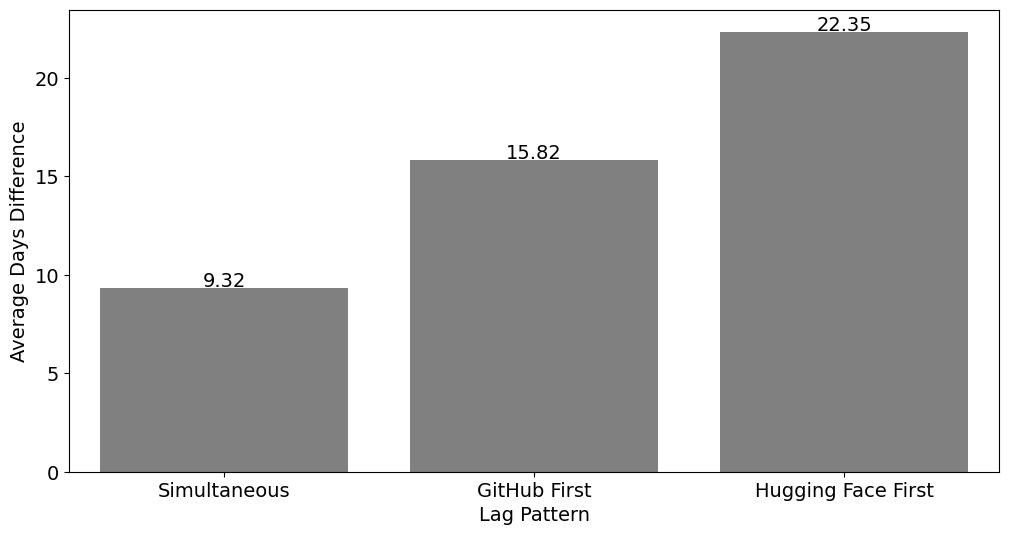

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scikit_posthocs import posthoc_dunn  # For post-hoc Dunn's test

# Set global font size to 14
plt.rcParams.update({'font.size': 14})

# Perform Kruskal-Wallis test to check if there's a significant difference between the groups
groups = [group["days_difference"].values for _, group in combined_days_diff.groupby("Lagged")]
stat, p = stats.kruskal(*groups)

# Check if the p-value is significant (p < 0.05)
if p < 0.05:
    print("Kruskal-Wallis indicates significant differences between groups.")
    
    # Perform Dunn's post-hoc test
    dunn_results = posthoc_dunn(combined_days_diff, val_col='days_difference', group_col='Lagged', p_adjust='bonferroni')
    print(dunn_results)
else:
    print("No significant differences found between groups.")

# Sort lag patterns by the median days_difference
# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('Lagged')['days_difference'].mean().sort_values().index

# Create a bar plot with uniform grey color and sorted Lagged
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Lagged', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Lag Pattern')
plt.ylabel('Average Days Difference')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=14, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


Kruskal-Wallis indicates significant differences between groups.
                         Dense Partial Alignment  Dispersed Alignment  \
Dense Partial Alignment             1.000000e+00         3.514010e-11   
Dispersed Alignment                 3.514010e-11         1.000000e+00   
Frequent Alignment                  1.252980e-02         3.483842e-66   
Intermittent Alignment              6.456600e-02         1.042775e-67   
Rare Alignment                      1.000000e+00         1.870778e-29   
Rare Disjoing                       4.951697e-29         1.419759e-17   
Sparse Alignment                    1.744077e-07         1.000000e+00   
Sporadic Disjoint                   2.907040e-38         5.343317e-25   

                         Frequent Alignment  Intermittent Alignment  \
Dense Partial Alignment        1.252980e-02            6.456600e-02   
Dispersed Alignment            3.483842e-66            1.042775e-67   
Frequent Alignment             1.000000e+00            1.000000e

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_8996\400229816.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(y='names', x='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


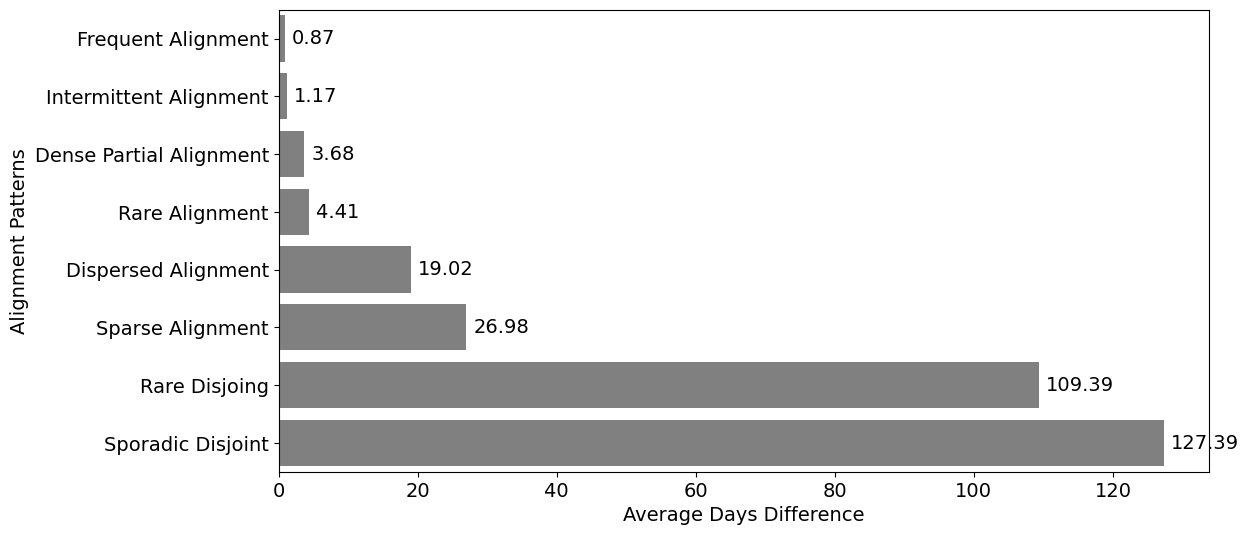

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scikit_posthocs import posthoc_dunn  # For post-hoc Dunn's test

# Set global font size to 14
plt.rcParams.update({'font.size': 14})

# Perform Kruskal-Wallis test to check if there's a significant difference between the groups
groups = [group["days_difference"].values for _, group in combined_days_diff.groupby("names")]
stat, p = stats.kruskal(*groups)

# Check if the p-value is significant (p < 0.05)
if p < 0.05:
    print("Kruskal-Wallis indicates significant differences between groups.")
    
    # Perform Dunn's post-hoc test
    dunn_results = posthoc_dunn(combined_days_diff, val_col='days_difference', group_col='names', p_adjust='bonferroni')
    print(dunn_results)
else:
    print("No significant differences found between groups.")


# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('names')['days_difference'].mean().sort_values().index

# Create a horizontal bar plot with uniform grey color and sorted 'names'
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='names', x='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the y-axis labels for better visibility
plt.yticks(rotation=0)

# Add labels and title
plt.ylabel('Alignment Patterns')
plt.xlabel('Average Days Difference')
#plt.title('Average Days Difference by Lag Pattern')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                fontsize=14, color='black', 
                xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.show()

In [12]:
dunn_results = posthoc_dunn(combined_days_diff, val_col='days_difference', group_col='names', p_adjust='bonferroni')
dunn_results_df = pd.DataFrame(dunn_results)

# Save to CSV file
dunn_results_df.to_csv("dunn_test_results.csv", index=True)

print("Dunn's test results saved to 'dunn_test_results.csv'")

Dunn's test results saved to 'dunn_test_results.csv'


Kruskal-Wallis indicates significant differences between groups.
                       Intermediate-Families  Matured-Families  \
Intermediate-Families           1.000000e+00      2.689047e-18   
Matured-Families                2.689047e-18      1.000000e+00   
Recent-Families                 2.132124e-02      7.503541e-23   

                       Recent-Families  
Intermediate-Families     2.132124e-02  
Matured-Families          7.503541e-23  
Recent-Families           1.000000e+00  


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_8996\2557644879.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='age_group', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


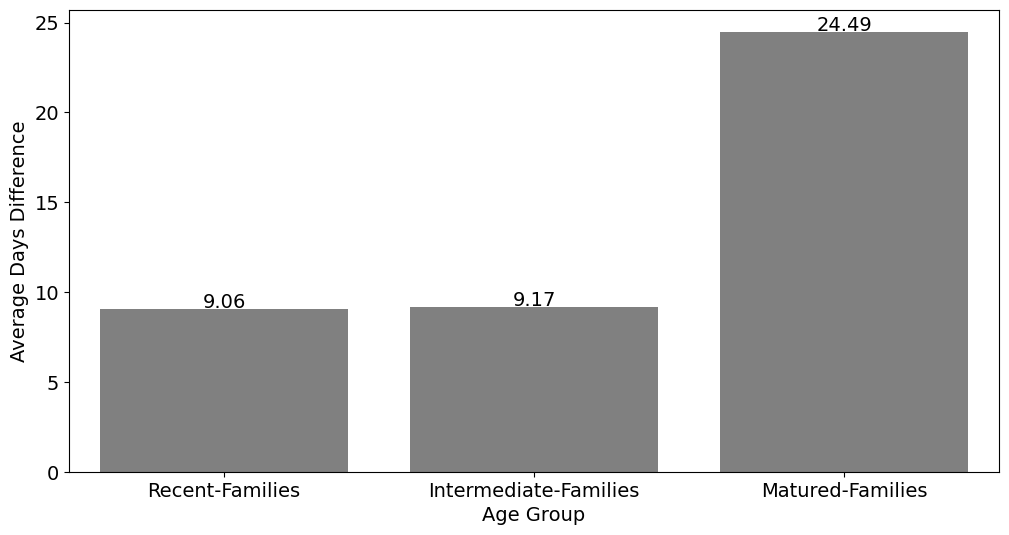

In [13]:
plt.rcParams.update({'font.size': 14})

# Perform Kruskal-Wallis test to check if there's a significant difference between the groups
groups = [group["days_difference"].values for _, group in combined_days_diff.groupby("age_group")]
stat, p = stats.kruskal(*groups)

# Check if the p-value is significant (p < 0.05)
if p < 0.05:
    print("Kruskal-Wallis indicates significant differences between groups.")
    
    # Perform Dunn's post-hoc test
    dunn_results = posthoc_dunn(combined_days_diff, val_col='days_difference', group_col='age_group', p_adjust='bonferroni')
    print(dunn_results)
else:
    print("No significant differences found between groups.")

# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('age_group')['days_difference'].mean().sort_values().index

# Create a bar plot with uniform grey color and sorted Lagged
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='age_group', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Days Difference')
#plt.title('Average Days Difference by Lag Pattern')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=14, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

In [14]:
dunn_results = posthoc_dunn(combined_days_diff, val_col='days_difference', group_col='age_group', p_adjust='bonferroni')
dunn_results

,Intermediate-Families,Matured-Families,Recent-Families
Intermediate-Families,1.000000e+00,2.689047e-18,2.132124e-02
Matured-Families,2.689047e-18,1.000000e+00,7.503541e-23
Recent-Families,2.132124e-02,7.503541e-23,1.000000e+00


In [28]:
days_diff = df_time_diffs.groupby("family").agg({
    'days_difference': 'mean'
}).reset_index()

days_diff

,family,days_difference
0,01-ai_YI,1.015625
1,1-800-BAD-CODE_XLM-ROBERTA,79.000000
2,42dot_42DOT-LLM,11.000000
3,AnnaWegmann_Style-Embedding,48.500000
4,BAAI_bge,0.528926
...,...,...
320,wukevin_tcr-bert,31.333333
321,wxjiao_alpaca,0.000000
322,xlnet_xlnet,23.285714
323,yahma_llama,66.000000


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\3520044628.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Lagged', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


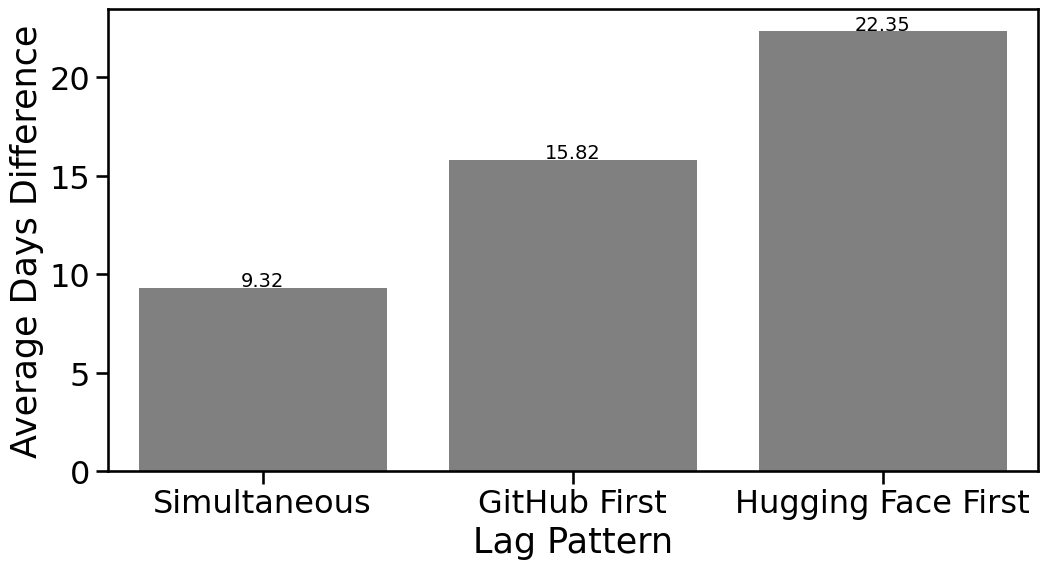

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global font size to 14
plt.rcParams.update({'font.size': 14})

# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('Lagged')['days_difference'].mean().sort_values().index

# Create a bar plot with uniform grey color and sorted Lagged
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Lagged', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Lag Pattern')
plt.ylabel('Average Days Difference')
#plt.title('Average Days Difference by Lag Pattern')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=14, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\2223440693.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='age_group', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


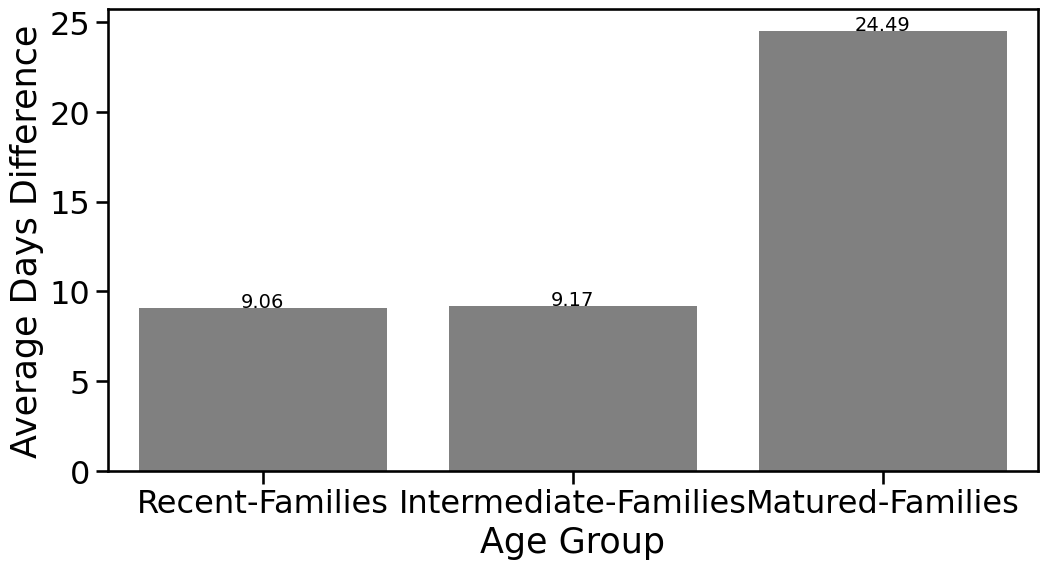

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global font size to 14
plt.rcParams.update({'font.size': 14})

# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('age_group')['days_difference'].mean().sort_values().index

# Create a bar plot with uniform grey color and sorted Lagged
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='age_group', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Days Difference')
#plt.title('Average Days Difference by Lag Pattern')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=14, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\1307699318.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(y='names', x='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


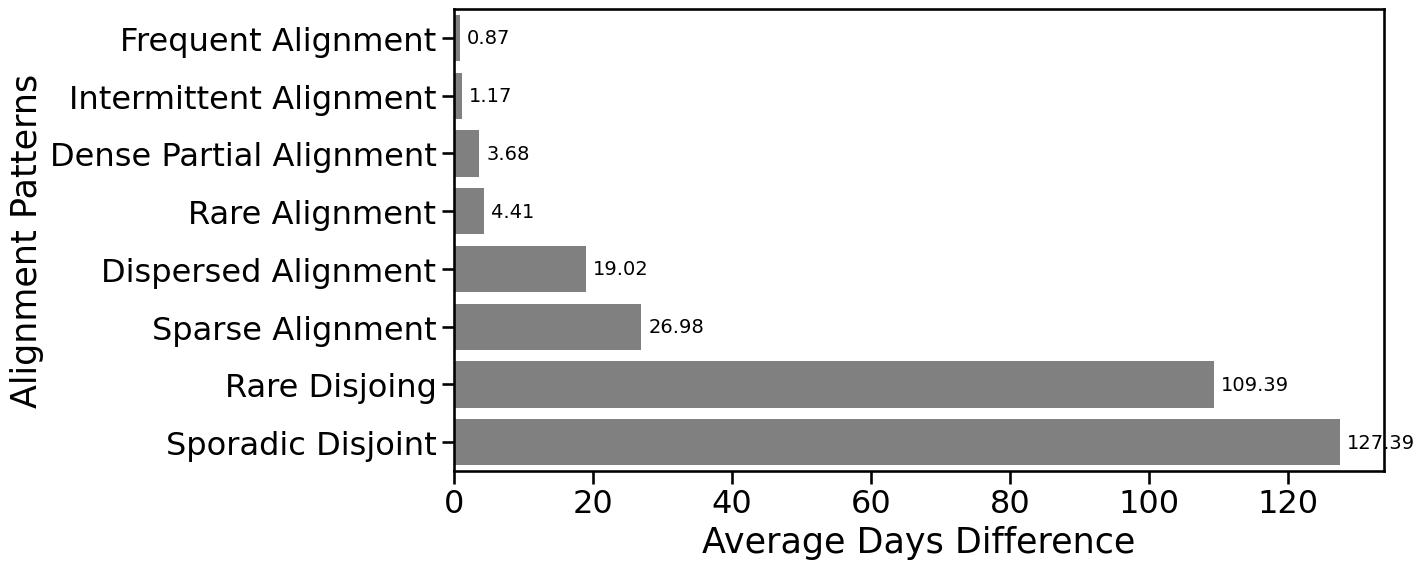

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global font size to 14
plt.rcParams.update({'font.size': 14})

# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('names')['days_difference'].mean().sort_values().index

# Create a horizontal bar plot with uniform grey color and sorted 'names'
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='names', x='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the y-axis labels for better visibility
plt.yticks(rotation=0)

# Add labels and title
plt.ylabel('Alignment Patterns')
plt.xlabel('Average Days Difference')
#plt.title('Average Days Difference by Lag Pattern')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                fontsize=14, color='black', 
                xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.show()


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\3527712363.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


ANOVA indicates significant differences between groups.
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                 group2         meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------------------------
Dense Partial Alignment    Dispersed Alignment  15.3388 0.0013    3.8909  26.7867   True
Dense Partial Alignment     Frequent Alignment  -2.8137 0.9975  -15.3228   9.6955  False
Dense Partial Alignment Intermittent Alignment  -2.5087 0.9986   -14.761   9.7436  False
Dense Partial Alignment         Rare Alignment    0.727    1.0  -12.8612  14.3152  False
Dense Partial Alignment          Rare Disjoing 105.7132    0.0   82.1178 129.3086   True
Dense Partial Alignment       Sparse Alignment  23.3051    0.0    8.9051   37.705   True
Dense Partial Alignment      Sporadic Disjoint 123.7129    0.0  103.2112 144.2147   True
    Dispersed Alignment     Frequent Alignment -18.152

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\3527712363.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(y='names', x='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


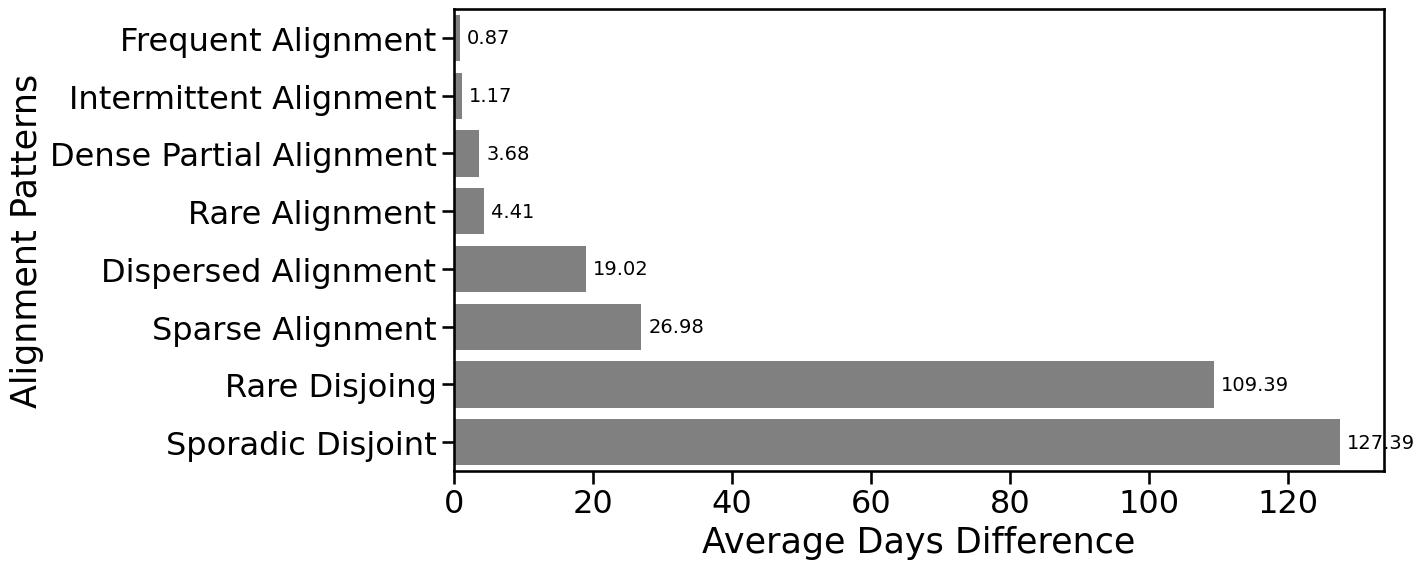

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Set global font size to 14
plt.rcParams.update({'font.size': 14})

# Perform ANOVA to check if there's a significant difference between the groups
anova_results = ols('days_difference ~ C(names)', data=combined_days_diff).fit()
anova_table = sm.stats.anova_lm(anova_results, typ=2)

# Check if the p-value is significant (p < 0.05)
if anova_table['PR(>F)'][0] < 0.05:
    print("ANOVA indicates significant differences between groups.")
    
    # Perform Tukey's HSD post-hoc test
    tukey = pairwise_tukeyhsd(endog=combined_days_diff['days_difference'],
                              groups=combined_days_diff['names'],
                              alpha=0.05)
    print(tukey.summary())
else:
    print("No significant differences found between groups.")

# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('names')['days_difference'].mean().sort_values().index

# Create a horizontal bar plot with uniform grey color and sorted 'names'
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='names', x='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the y-axis labels for better visibility
plt.yticks(rotation=0)

# Add labels and title
plt.ylabel('Alignment Patterns')
plt.xlabel('Average Days Difference')
#plt.title('Average Days Difference by Lag Pattern')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                fontsize=14, color='black', 
                xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.show()


In [4]:
# Test for normality (Shapiro-Wilk test)
from scipy.stats import shapiro

for group in combined_days_diff['Lagged'].unique():
    stat, p = shapiro(combined_days_diff[combined_days_diff['Lagged'] == group]['days_difference'])
    print(f"Shapiro test for {group}: p-value = {p:.4f}")

# Test for homogeneity of variances (Levene’s test)
from scipy.stats import levene

stat, p = levene(*[group["days_difference"].values for name, group in combined_days_diff.groupby("Lagged")])
print(f"Levene’s test p-value: {p:.4f}")


Shapiro test for GitHub First: p-value = 0.0000
Shapiro test for Simultaneous: p-value = 0.0000
Shapiro test for Hugging Face First: p-value = 0.0000
Levene’s test p-value: 0.0000


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\3726821578.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


ANOVA indicates significant differences between groups.
             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------
      GitHub First Hugging Face First     6.53 0.0366   0.3193 12.7406   True
      GitHub First       Simultaneous  -6.5015  0.003 -11.1522 -1.8508   True
Hugging Face First       Simultaneous -13.0315    0.0 -19.8466 -6.2164   True
-----------------------------------------------------------------------------


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\3726821578.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Lagged', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


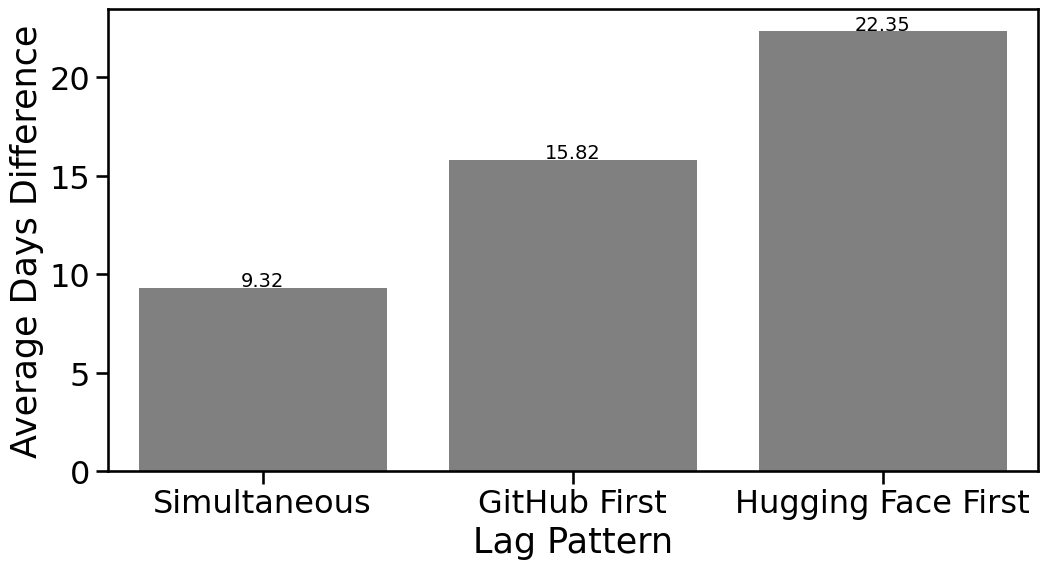

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Set global font size to 14
plt.rcParams.update({'font.size': 14})

# Perform ANOVA to check if there's a significant difference between the groups
anova_results = ols('days_difference ~ C(Lagged)', data=combined_days_diff).fit()
anova_table = sm.stats.anova_lm(anova_results, typ=2)

# Check if the p-value is significant (p < 0.05)
if anova_table['PR(>F)'][0] < 0.05:
    print("ANOVA indicates significant differences between groups.")
    
    # Perform Tukey's HSD post-hoc test
    tukey = pairwise_tukeyhsd(endog=combined_days_diff['days_difference'],
                              groups=combined_days_diff['Lagged'],
                              alpha=0.05)
    print(tukey.summary())
else:
    print("No significant differences found between groups.")

# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('Lagged')['days_difference'].mean().sort_values().index

# Create a bar plot with uniform grey color and sorted Lagged
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Lagged', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Lag Pattern')
plt.ylabel('Average Days Difference')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=14, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


ANOVA indicates significant differences between groups.


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\3488799019.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
        group1             group2      meandiff p-adj   lower    upper  reject
------------------------------------------------------------------------------
Intermediate-Families Matured-Families  15.3143    0.0  10.7891 19.8396   True
Intermediate-Families  Recent-Families  -0.1116 0.9987  -5.4819  5.2587  False
     Matured-Families  Recent-Families -15.4259    0.0 -20.9021 -9.9498   True
------------------------------------------------------------------------------


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\3488799019.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='age_group', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


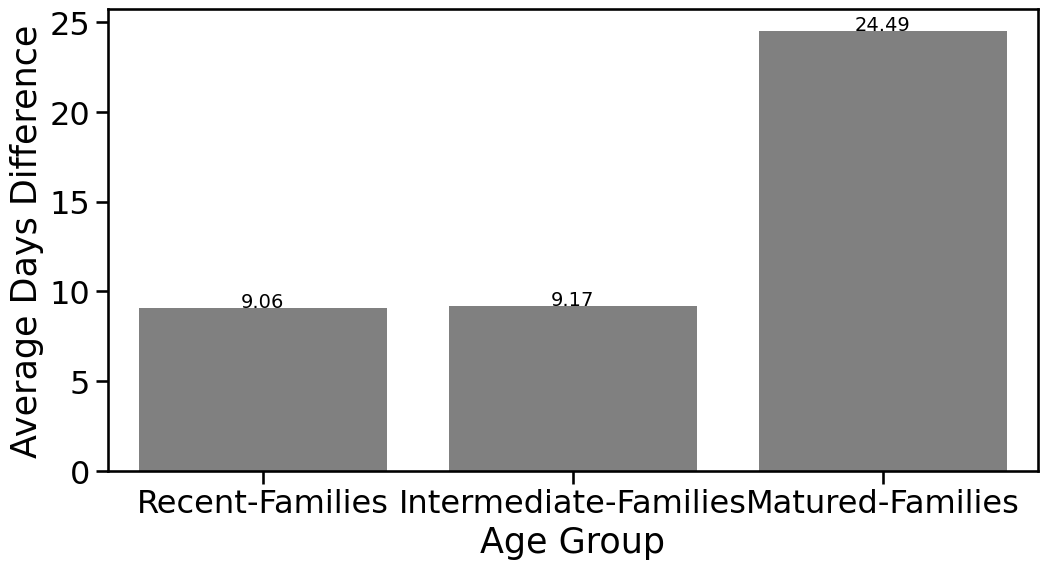

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global font size to 14
plt.rcParams.update({'font.size': 14})

# Perform ANOVA to check if there's a significant difference between the groups
anova_results = ols('days_difference ~ C(age_group)', data=combined_days_diff).fit()
anova_table = sm.stats.anova_lm(anova_results, typ=2)

# Check if the p-value is significant (p < 0.05)
if anova_table['PR(>F)'][0] < 0.05:
    print("ANOVA indicates significant differences between groups.")
    
    # Perform Tukey's HSD post-hoc test
    tukey = pairwise_tukeyhsd(endog=combined_days_diff['days_difference'],
                              groups=combined_days_diff['age_group'],
                              alpha=0.05)
    print(tukey.summary())
else:
    print("No significant differences found between groups.")

# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('age_group')['days_difference'].mean().sort_values().index

# Create a bar plot with uniform grey color and sorted Lagged
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='age_group', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Days Difference')
#plt.title('Average Days Difference by Lag Pattern')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=14, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


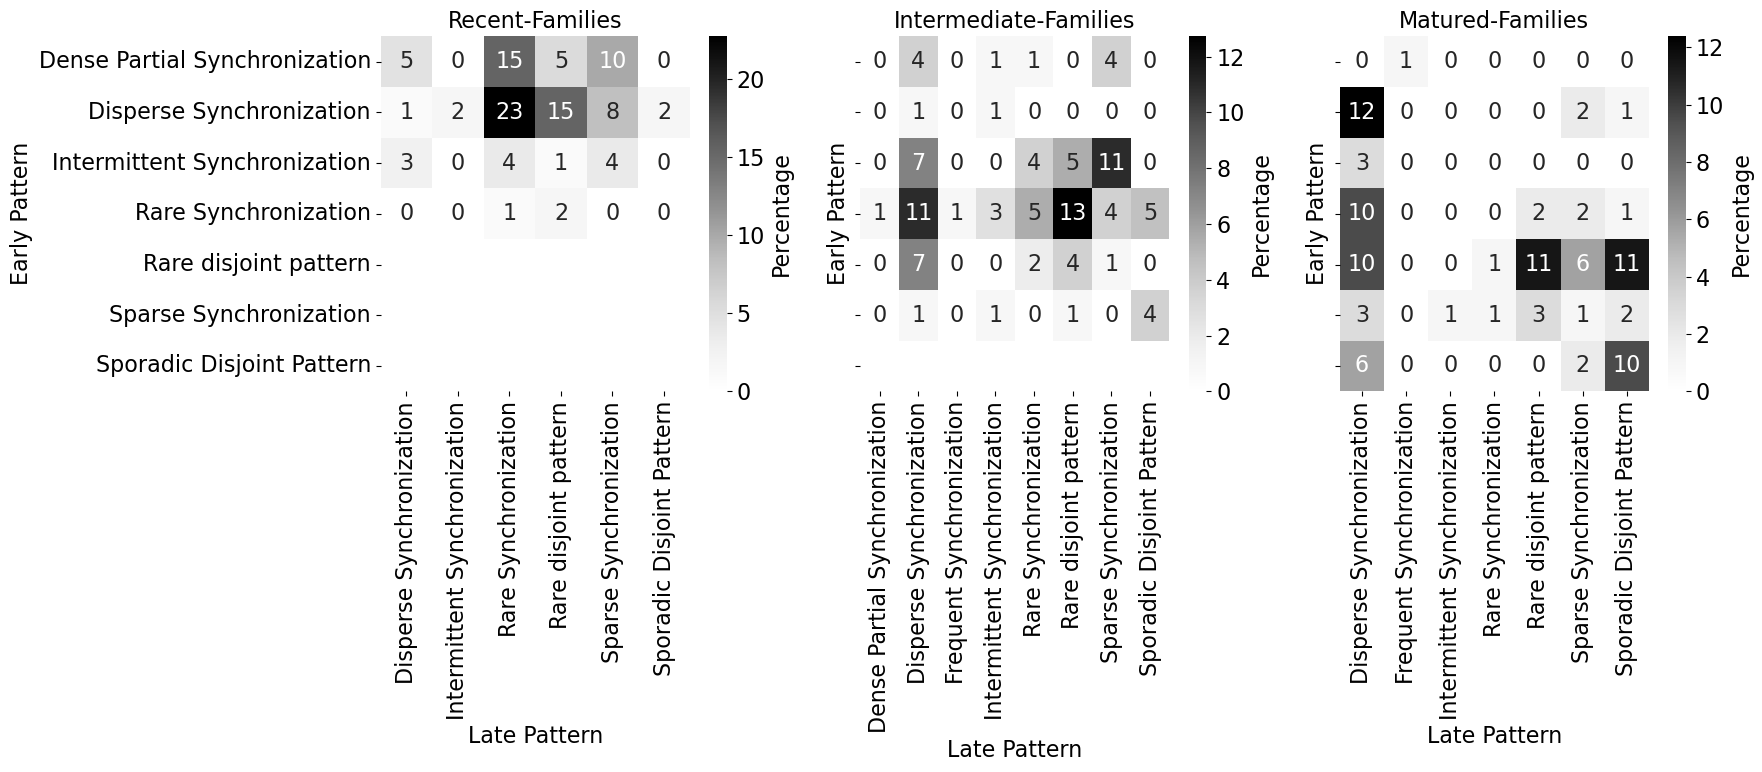

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set global font size
plt.rcParams.update({'font.size': 16})

# Load the dataset
file = "RQ2_early_late_pattern.csv"
file2 = "grouped_data_RQ2.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df_prime = pd.read_csv(file, encoding='latin1')
df2_prime = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(dfs2['family'].unique())

df = df_prime[~df_prime['family'].isin(exclusion)]
df2 = df2_prime[~df2_prime['family'].isin(exclusion)]

# Group families by age group
family = df2.groupby('family').agg({
    'age_group': lambda x: ",".join(map(str, x.unique())),
}).reset_index()

# Merge datasets
comb = pd.merge(df, family, on='family', how='inner')

# Define age group categories
category_order = ["Recent-Families", "Intermediate-Families", "Matured-Families"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# Name mapping
name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization'
}

# Loop through age groups
for ax, age_group in zip(axes, category_order):
    group_data = comb[comb['age_group'] == age_group].copy()
    
    group_data['early_pattern'] = group_data['early_pattern'].replace(name_mapping)
    group_data['late_pattern'] = group_data['late_pattern'].replace(name_mapping)

    transition_matrix = pd.crosstab(
        group_data['early_pattern'], group_data['late_pattern']
    ).fillna(0)

    transition_matrix_percentage = (transition_matrix / transition_matrix.sum().sum()) * 100

    # Heatmap
    sns.heatmap(
        transition_matrix_percentage,
        annot=True, fmt=".0f", cmap="Greys", cbar=True,
        ax=ax, annot_kws={"size": 16}
    )

    # Titles and labels
    ax.set_title(f"{age_group}", fontsize=16)
    ax.set_xlabel("Late Pattern", fontsize=16)
    ax.set_ylabel("Early Pattern", fontsize=16)
    ax.tick_params(axis='both', labelsize=16)

    # Colorbar formatting
    if ax.collections:
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=16)
        cbar.set_label("Percentage", fontsize=16)

# Adjust layout and save
plt.tight_layout()
#plt.savefig("RQ2.3.1d.pdf")
plt.show()


In [9]:

dfs

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_4964\2894963901.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)


,owner,family,generated,Syncs,intensity,codes,Lagged,pattern_names,names
0,01-ai,01-ai_YI,manual,CS,F,CSF,No Lag,Frequent Synchronization,Frequent Alignment
1,1-800-BAD-CODE,1-800-BAD-CODE_XLM-ROBERTA,manual,PS,S,PSS,Upstream First,Disperse Synchronization,Dispersed Alignment
3,ai-forever,ai-forever_gpt,manual,PS,S,PSS,No Lag,Disperse Synchronization,Dispersed Alignment
4,ai-forever,ai-forever_sbert,manual,AS,S,ASS,Upstream First,Sporadic Disjoint Synchronization,Sporadic Disjoint
5,alisawuffles,alisawuffles_roberta,manual,AS,S,ASS,Downstream First,Sporadic Disjoint Synchronization,Sporadic Disjoint
...,...,...,...,...,...,...,...,...,...
333,stabilityai,stabilityai_japanese-stablelm,automatic,PS,R,PSR,Downstream First,Sparse Synchronization,Sparse Alignment
334,facebook,facebook_dragon,automatic,AS,R,ASR,Downstream First,Rare Disjoing pattern,Rare Disjoing
335,TIGER-Lab,TIGER-Lab_MAmmoTH2,automatic,CS,R,CSR,No Lag,Rare Synchronization,Rare Alignment
336,Muennighoff,Muennighoff_SGPT,automatic,PS,S,PSS,No Lag,Disperse Synchronization,Dispersed Alignment


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file = "all_auto_and_manual_patterns.csv"
file1 = "../RQ1/GH_labelled_combined_csv_file.csv"
file2 = "../RQ1/HF_all_labels_from_gemini.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# Exclude specific families
exclusion = list(df2['family'].unique())
dfs = df1[~df1['family'].isin(exclusion)]

# Replace 'Dispersed Alignment' with 'Disperse Alignment'
name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint Synchronization'
}
dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)


GH1 = pd.read_csv(file1, encoding='latin1')
HF1 = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(dfs2['family'].unique())
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']

GH2 = GH1[~GH1['label'].isin(exclusion)]
HF2 = HF1[~HF1['label'].isin(exclusion)]

GH_main = GH2[~GH2['label'].isin(excluded_labels)]
HF_main = HF2[~HF2['label'].isin(excluded_labels)]

gf_dfs = dfs.groupby('family').agg({
    'pattern_names': lambda x: ''.join(x.unique())
}).reset_index()

GH = pd.merge(GH_main, gf_dfs, on='family', how='outer')
HF = pd.merge(HF_main, gf_dfs, on='family', how='outer')
HF

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_4964\82645948.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)
C:\Users\LabSystem\AppData\Local\Temp\ipykernel_4964\82645948.py:32: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH1 = pd.read_csv(file1, encoding='latin1')


,owner,model_name,created_at,last_updated,family,model_size,previous_size_category,downloads,likes,library_name,...,cleaned_github,title,message,commit_id,date,author,files,combined,label,pattern_names
0,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,https://github.com/01-ai/yi,Upload tokenizer.json,NaN,fa4ffba162f20948bf77c2a30eca952bf0812b7f,8/27/2024,Mia01ai,tokenizer.json,upload tokenizer.json,preprocessing,Frequent Synchronization
1,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,https://github.com/01-ai/yi,Delete tokenizer.json,NaN,c778adea4d63eb5812ee2f4bfff0f43fe1e99cde,8/27/2024,Mia01ai,tokenizer.json,delete tokenizer.json,preprocessing,Frequent Synchronization
2,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,https://github.com/01-ai/yi,Upload NOTICE,NaN,aa880dd36346295f0ef0255cd8c8e398251a0f5e,6/26/2024,Chen-01AI,NOTICE,upload notice,external documentation,Frequent Synchronization
3,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,https://github.com/01-ai/yi,Delete NOTICE,NaN,8a09fd99c176e9024ee64e319883e4da479b8bc1,6/26/2024,Chen-01AI,NOTICE,delete notice,external documentation,Frequent Synchronization
4,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,https://github.com/01-ai/yi,Upload NOTICE,NaN,3a2619d14e1cf6a9fe1792c2b96acfb4538272c7,6/26/2024,Chen-01AI,NOTICE,upload notice,external documentation,Frequent Synchronization
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17151,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,https://github.com/yitu-opensource/ConvBert,fix config,NaN,9001261c1cbfc93899a1cab9d2e9c980f65835a4,2/2/2021,abhishek,config.json,fix config,parameter tuning,Rare Disjoing pattern
17152,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,https://github.com/yitu-opensource/ConvBert,update models,NaN,3abdc6f9b0755d5260e97df36d4bfe147b0310b7,1/21/2021,abhishek,"pytorch_model.bin, tf_model.h5",update models,model structure,Rare Disjoing pattern
17153,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,https://github.com/yitu-opensource/ConvBert,fix path,NaN,64c19bcb08466f8547285d8d262ab8a723185309,1/21/2021,abhishek,config.json,fix path,preprocessing,Rare Disjoing pattern
17154,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,https://github.com/yitu-opensource/ConvBert,add convbert base,NaN,ea841915807b45fbaca73983bba97921046a5601,1/21/2021,abhishek,"config.json, pytorch_model.bin, tf_model.h5, v...",add convbert base,model structure,Rare Disjoing pattern


In [44]:
GH

,owner,cleaned_github,author_name,commit_message,author_username,commit_date,family,label,issue_resolved,pattern_names
0,01-ai,https://github.com/01-ai/yi,Haijian Wang,update readme.md,Haijian06,2024-09-23 12:36:06+00:00,01-ai_YI,external documentation,NaN,Frequent Synchronization
1,01-ai,https://github.com/01-ai/yi,nlmlml,update readme.md,nlmlml,2024-09-23 12:19:50+00:00,01-ai_YI,external documentation,NaN,Frequent Synchronization
2,01-ai,https://github.com/01-ai/yi,Haijian Wang,update readme.md,Haijian06,2024-09-23 12:17:42+00:00,01-ai_YI,external documentation,NaN,Frequent Synchronization
3,01-ai,https://github.com/01-ai/yi,Haijian Wang,update readme.md,Haijian06,2024-09-23 12:13:15+00:00,01-ai_YI,external documentation,NaN,Frequent Synchronization
4,01-ai,https://github.com/01-ai/yi,Haijian Wang,update readme.md,Haijian06,2024-09-23 12:08:43+00:00,01-ai_YI,external documentation,NaN,Frequent Synchronization
...,...,...,...,...,...,...,...,...,...,...
150906,xlnet,https://github.com/zihangdai/xlnet,Zihang Dai,edit download link,zihangdai,2019-06-19 23:34:13+00:00,xlnet_xlnet,external documentation,NaN,Disperse Synchronization
150907,xlnet,https://github.com/zihangdai/xlnet,Zihang Dai,merge branch 'master' of github.com:zihangdai/...,zihangdai,2019-06-19 23:23:46+00:00,xlnet_xlnet,internal documentation,NaN,Disperse Synchronization
150908,xlnet,https://github.com/zihangdai/xlnet,Zihang Dai,initial release of xlnet,zihangdai,2019-06-19 23:23:36+00:00,xlnet_xlnet,project metadata,NaN,Disperse Synchronization
150909,xlnet,https://github.com/zihangdai/xlnet,Zhilin Yang,update license,Unknown,2019-06-19 23:10:02+00:00,xlnet_xlnet,project metadata,NaN,Disperse Synchronization


In [24]:
GH_prev = GH.groupby(['family', 'pattern_names', 'label']).agg({
    'commit_message': 'nunique',
}).reset_index()


HF_prev = HF.groupby(['family', 'pattern_names', 'label']).agg({
    'combined': 'nunique',
}).reset_index()

HF_prev

,family,pattern_names,label,combined
0,01-ai_YI,Frequent Synchronization,add dependency,2
1,01-ai_YI,Frequent Synchronization,external documentation,25
2,01-ai_YI,Frequent Synchronization,input data,1
3,01-ai_YI,Frequent Synchronization,model structure,9
4,01-ai_YI,Frequent Synchronization,output data,2
...,...,...,...,...
1793,yahma_llama,Rare Disjoing pattern,external documentation,1
1794,yahma_llama,Rare Disjoing pattern,project metadata,2
1795,yangheng_absa-model,Disperse Synchronization,external documentation,1
1796,yangheng_absa-model,Disperse Synchronization,output data,1


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file = "all_auto_and_manual_patterns.csv"
file1 = "../RQ1/GH_labelled_combined_csv_file.csv"
file2 = "../RQ1/HF_all_labels_from_gemini.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# Exclude specific families
exclusion = list(df2['family'].unique())
dfs = df1[~df1['family'].isin(exclusion)]

# Replace 'Dispersed Alignment' with 'Disperse Alignment'
name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint Synchronization'
}
dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)


GH1 = pd.read_csv(file1, encoding='latin1')
HF1 = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(dfs2['family'].unique())
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']

GH2 = GH1[~GH1['label'].isin(exclusion)]
HF2 = HF1[~HF1['label'].isin(exclusion)]

GH_main = GH2[~GH2['label'].isin(excluded_labels)]
HF_main = HF2[~HF2['label'].isin(excluded_labels)]

gf_dfs = dfs.groupby('family').agg({
    'pattern_names': lambda x: ''.join(x.unique())
}).reset_index()

GH = pd.merge(GH_main, gf_dfs, on='family', how='outer')
HF = pd.merge(HF_main, gf_dfs, on='family', how='outer')

GH_prev = GH.groupby(['family', 'pattern_names', 'label']).agg({
    'commit_message': 'nunique',
    'author_username': 'nunique'
}).reset_index()


HF_prev = HF.groupby(['family', 'pattern_names', 'label']).agg({
    'combined': 'nunique',
    'author': 'nunique'
}).reset_index()

HF_prev

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_4964\8594368.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)
C:\Users\LabSystem\AppData\Local\Temp\ipykernel_4964\8594368.py:32: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH1 = pd.read_csv(file1, encoding='latin1')


,family,pattern_names,label,combined,author
0,01-ai_YI,Frequent Synchronization,add dependency,2,2
1,01-ai_YI,Frequent Synchronization,external documentation,25,12
2,01-ai_YI,Frequent Synchronization,input data,1,1
3,01-ai_YI,Frequent Synchronization,model structure,9,3
4,01-ai_YI,Frequent Synchronization,output data,2,1
...,...,...,...,...,...
1793,yahma_llama,Rare Disjoing pattern,external documentation,1,1
1794,yahma_llama,Rare Disjoing pattern,project metadata,2,1
1795,yangheng_absa-model,Disperse Synchronization,external documentation,1,1
1796,yangheng_absa-model,Disperse Synchronization,output data,1,1


In [47]:
GH_prev = GH.groupby(['pattern_names', 'label']).agg({
    'commit_message': 'nunique',
    'author_username': 'nunique'
}).reset_index().rename(columns={'commit_message': 'count'})

HF_prev = HF.groupby(['pattern_names', 'label']).agg({
    'combined': 'nunique',
    'author': 'nunique'
}).reset_index().rename(columns={'combined': 'count'})

GH_prev

,pattern_names,label,count,author_username
0,Dense Partial Synchronization,add dependency,96,34
1,Dense Partial Synchronization,external documentation,330,78
2,Dense Partial Synchronization,input data,46,15
3,Dense Partial Synchronization,internal documentation,107,30
4,Dense Partial Synchronization,model structure,1476,72
...,...,...,...,...
115,Sporadic Disjoint Synchronization,remove dependency,11,8
116,Sporadic Disjoint Synchronization,sharing,100,31
117,Sporadic Disjoint Synchronization,training infrastructure,183,42
118,Sporadic Disjoint Synchronization,update dependency,66,29


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_4964\1644488862.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)
C:\Users\LabSystem\AppData\Local\Temp\ipykernel_4964\1644488862.py:35: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH1 = pd.read_csv(file1, encoding='latin1')


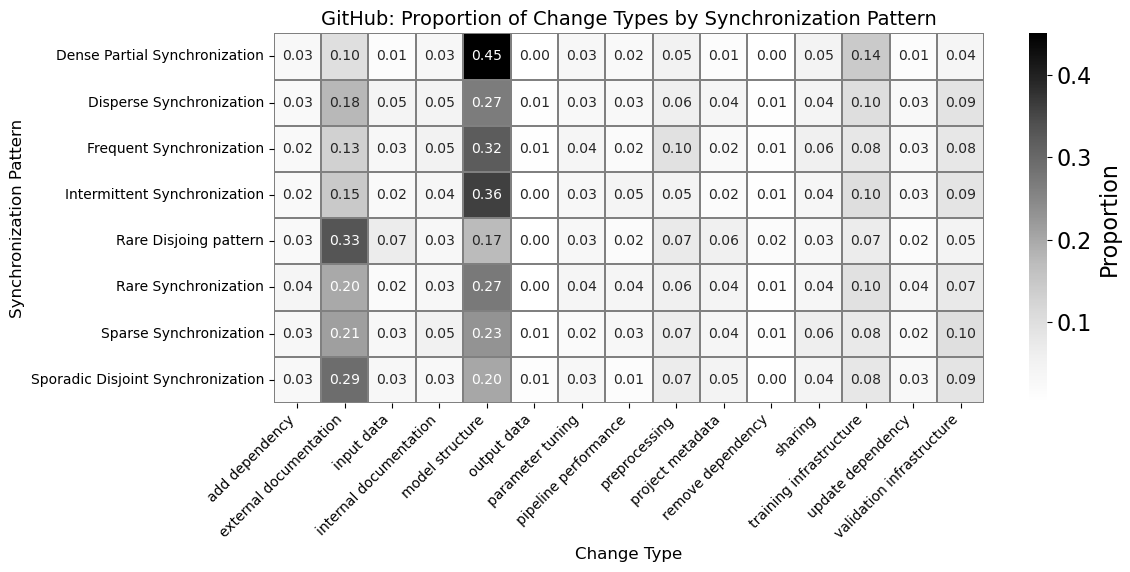

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Load the data ===
file = "all_auto_and_manual_patterns.csv"
file1 = "../RQ1/GH_labelled_combined_csv_file.csv"
file2 = "../RQ1/HF_all_labels_from_gemini.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# === Exclude specific families ===
exclusion = list(df2['family'].unique())
dfs = df1[~df1['family'].isin(exclusion)]

# === Clean up pattern name mappings ===
name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint Synchronization'
}
dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)

# === Keep only unique (family, pattern) mappings ===
gf_dfs = dfs[['family', 'pattern_names']].drop_duplicates()

# === Load GH label data ===
GH1 = pd.read_csv(file1, encoding='latin1')

# === Exclude unwanted families and labels ===
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']
GH2 = GH1[~GH1['label'].isin(exclusion)]
GH_main = GH2[~GH2['label'].isin(excluded_labels)]

# === Merge GitHub data with pattern information ===
GH = pd.merge(GH_main, gf_dfs, on='family', how='inner')

# === Count commits per (pattern, label) ===
GH_prev = GH.groupby(['pattern_names', 'label']).agg({
    'commit_message': 'nunique',
}).reset_index().rename(columns={'commit_message': 'count'})

# === Pivot for heatmap ===
pivot_gh = GH_prev.pivot_table(index='pattern_names', columns='label', values='count', fill_value=0)

# === Normalize rows to get proportions ===
pivot_gh_prop = pivot_gh.div(pivot_gh.sum(axis=1), axis=0)


pivot_gh_prop = pivot_gh_prop.sort_index(axis=0).sort_index(axis=1)

# Adjust figure size dynamically based on number of columns/labels
num_patterns = pivot_gh_prop.shape[0]
num_labels = pivot_gh_prop.shape[1]

# Use larger figure for readability
fig_width = max(12, num_labels * 0.8)
fig_height = max(6, num_patterns * 0.6)

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(
    pivot_gh_prop,
    annot=True,
    fmt=".2f",
    cmap="Greys",
    linewidths=0.1,
    linecolor='gray',
    cbar_kws={'label': 'Proportion'},
    annot_kws={"size": 10}
)

plt.title("GitHub: Proportion of Change Types by Synchronization Pattern", fontsize=14)
plt.ylabel("Synchronization Pattern", fontsize=12)
plt.xlabel("Change Type", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_4964\2974176596.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)


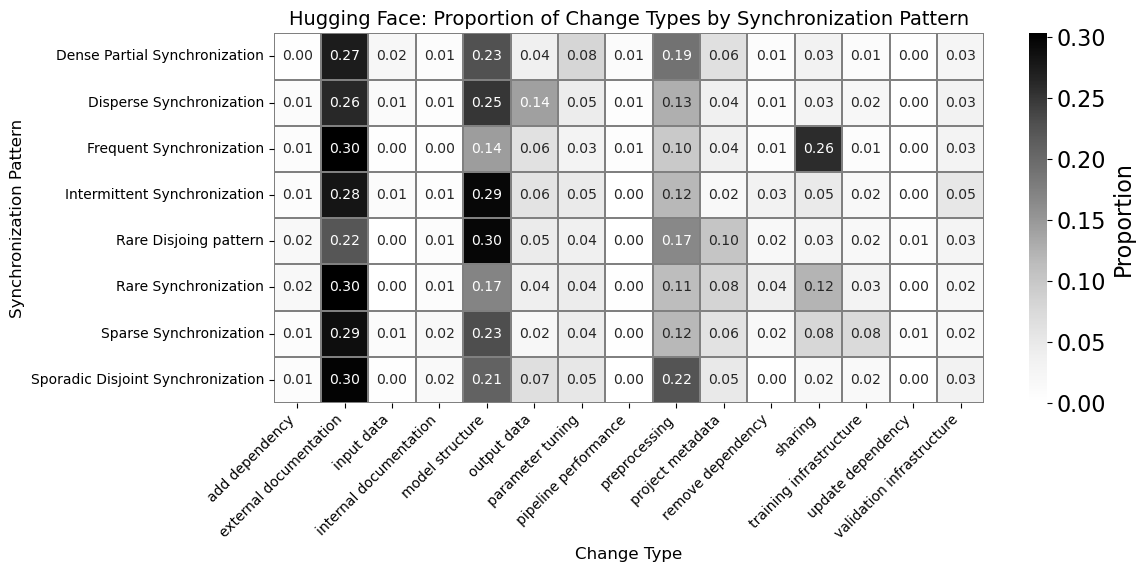

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Load the data ===
file = "all_auto_and_manual_patterns.csv"
file1 = "../RQ1/GH_labelled_combined_csv_file.csv"
file2 = "../RQ1/HF_all_labels_from_gemini.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# === Exclude specific families ===
exclusion = list(df2['family'].unique())
dfs = df1[~df1['family'].isin(exclusion)]

# === Clean up pattern name mappings ===
name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint Synchronization'
}
dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)

# === Keep only unique (family, pattern) mappings ===
gf_dfs = dfs[['family', 'pattern_names']].drop_duplicates()

# === Load HF label data ===
HF1 = pd.read_csv(file2, encoding='latin1')

# === Exclude unwanted families and labels ===
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']
HF2 = HF1[~HF1['label'].isin(exclusion)]
HF_main = HF2[~HF2['label'].isin(excluded_labels)]

# === Merge HF data with pattern information ===
HF = pd.merge(HF_main, gf_dfs, on='family', how='inner')

# === Count labels per (pattern, label) ===
HF_prev = HF.groupby(['pattern_names', 'label']).agg({
    'combined': 'nunique'
}).reset_index().rename(columns={'combined': 'count'})

# === Pivot for heatmap ===
pivot_hf = HF_prev.pivot_table(index='pattern_names', columns='label', values='count', fill_value=0)

# === Normalize rows to get proportions ===
pivot_hf_prop = pivot_hf.div(pivot_hf.sum(axis=1), axis=0)

# === Sort for readability ===
pivot_hf_prop = pivot_hf_prop.sort_index(axis=0).sort_index(axis=1)

# === Adjust figure size dynamically based on content ===
num_patterns = pivot_hf_prop.shape[0]
num_labels = pivot_hf_prop.shape[1]

fig_width = max(12, num_labels * 0.8)
fig_height = max(6, num_patterns * 0.6)

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(
    pivot_hf_prop,
    annot=True,
    fmt=".2f",
    cmap="Greys",
    linewidths=0.1,
    linecolor='gray',
    cbar_kws={'label': 'Proportion'},
    annot_kws={"size": 10}
)

plt.title("Hugging Face: Proportion of Change Types by Synchronization Pattern", fontsize=14)
plt.ylabel("Synchronization Pattern", fontsize=12)
plt.xlabel("Change Type", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_4964\2931674572.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)
C:\Users\LabSystem\AppData\Local\Temp\ipykernel_4964\2931674572.py:35: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH1 = pd.read_csv(file1, encoding='latin1')


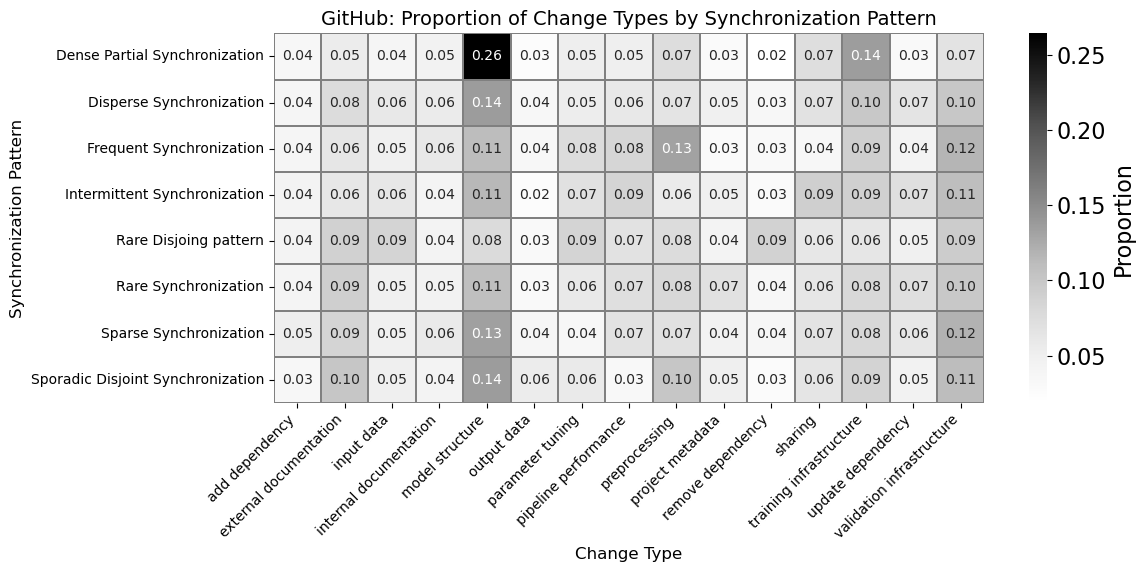

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Load the data ===
file = "all_auto_and_manual_patterns.csv"
file1 = "../RQ1/GH_labelled_combined_csv_file.csv"
file2 = "../RQ1/HF_all_labels_from_gemini.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# === Exclude specific families ===
exclusion = list(df2['family'].unique())
dfs = df1[~df1['family'].isin(exclusion)]

# === Clean up pattern name mappings ===
name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint Synchronization'
}
dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)

# === Keep only unique (family, pattern) mappings ===
gf_dfs = dfs[['family', 'pattern_names']].drop_duplicates()

# === Load GH label data ===
GH1 = pd.read_csv(file1, encoding='latin1')

# === Exclude unwanted families and labels ===
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']
GH2 = GH1[~GH1['label'].isin(exclusion)]
GH_main = GH2[~GH2['label'].isin(excluded_labels)]

# === Merge GitHub data with pattern information ===
GH = pd.merge(GH_main, gf_dfs, on='family', how='inner')

# === Count commits per (pattern, label) ===
GH_prev = GH.groupby(['pattern_names', 'label']).agg({
    'commit_message': 'nunique',
    'author_username': 'nunique'
}).reset_index().rename(columns={'commit_message': 'count', 'author_username': 'authors'})

# Normalize by authors
GH_prev['commits_per_author'] = GH_prev['count'] / GH_prev['authors']

# === Pivot for heatmap ===
pivot_gh = GH_prev.pivot_table(index='pattern_names', columns='label', values='commits_per_author', fill_value=0)

# === Normalize rows to get proportions ===
pivot_gh_prop = pivot_gh.div(pivot_gh.sum(axis=1), axis=0)


pivot_gh_prop = pivot_gh_prop.sort_index(axis=0).sort_index(axis=1)

# Adjust figure size dynamically based on number of columns/labels
num_patterns = pivot_gh_prop.shape[0]
num_labels = pivot_gh_prop.shape[1]

# Use larger figure for readability
fig_width = max(12, num_labels * 0.8)
fig_height = max(6, num_patterns * 0.6)

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(
    pivot_gh_prop,
    annot=True,
    fmt=".2f",
    cmap="Greys",
    linewidths=0.1,
    linecolor='gray',
    cbar_kws={'label': 'Proportion'},
    annot_kws={"size": 10}
)

plt.title("GitHub: Proportion of Change Types by Synchronization Pattern", fontsize=14)
plt.ylabel("Synchronization Pattern", fontsize=12)
plt.xlabel("Change Type", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_4964\226151367.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)


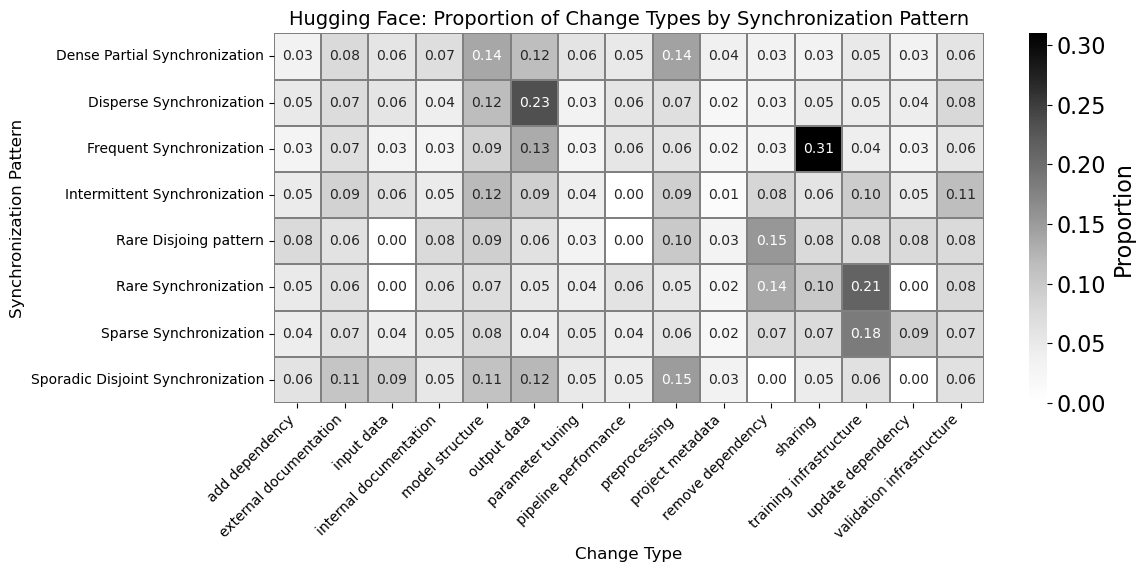

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Load the data ===
file = "all_auto_and_manual_patterns.csv"
file1 = "../RQ1/GH_labelled_combined_csv_file.csv"
file2 = "../RQ1/HF_all_labels_from_gemini.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# === Exclude specific families ===
exclusion = list(df2['family'].unique())
dfs = df1[~df1['family'].isin(exclusion)]

# === Clean up pattern name mappings ===
name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint Synchronization'
}
dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)

# === Keep only unique (family, pattern) mappings ===
gf_dfs = dfs[['family', 'pattern_names']].drop_duplicates()

# === Load HF label data ===
HF1 = pd.read_csv(file2, encoding='latin1')

# === Exclude unwanted families and labels ===
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']
HF2 = HF1[~HF1['label'].isin(exclusion)]
HF_main = HF2[~HF2['label'].isin(excluded_labels)]

# === Merge HF data with pattern information ===
HF = pd.merge(HF_main, gf_dfs, on='family', how='inner')

# === Count labels per (pattern, label) ===
HF_prev = HF.groupby(['pattern_names', 'label']).agg({
    'combined': 'nunique',
    'author': 'nunique'
}).reset_index().rename(columns={'combined': 'count', 'author': 'authors'})


# Normalize by authors
HF_prev['commits_per_author'] = HF_prev['count'] / HF_prev['authors']

# === Pivot for heatmap ===
pivot_hf = HF_prev.pivot_table(index='pattern_names', columns='label', values='commits_per_author', fill_value=0)

# === Normalize rows to get proportions ===
pivot_hf_prop = pivot_hf.div(pivot_hf.sum(axis=1), axis=0)

# === Sort for readability ===
pivot_hf_prop = pivot_hf_prop.sort_index(axis=0).sort_index(axis=1)

# === Adjust figure size dynamically based on content ===
num_patterns = pivot_hf_prop.shape[0]
num_labels = pivot_hf_prop.shape[1]

fig_width = max(12, num_labels * 0.8)
fig_height = max(6, num_patterns * 0.6)

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(
    pivot_hf_prop,
    annot=True,
    fmt=".2f",
    cmap="Greys",
    linewidths=0.1,
    linecolor='gray',
    cbar_kws={'label': 'Proportion'},
    annot_kws={"size": 10}
)

plt.title("Hugging Face: Proportion of Change Types by Synchronization Pattern", fontsize=14)
plt.ylabel("Synchronization Pattern", fontsize=12)
plt.xlabel("Change Type", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


In [6]:
pip install scikit-posthocs

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\labsystem\appdata\local\anaconda3\envs\mlearning\lib\site-packages\huggingface_hub-0.18.0-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
